# C√¥ng vi·ªác 1: Kh√°m ph√° v√† x·ª≠ l√Ω d·ªØ li·ªáu

In [449]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PH√ÇN T√çCH C√ÅC Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG ƒê·∫æN K·∫æT QU·∫¢ H·ªåC T·∫¨P").getOrCreate()
path = 'D:/nƒÉm 3/HK2/ph√¢n t√≠ch d·ªØ li·ªáu/'
Student = spark.read.csv(path + 'student-mat.csv', header=True, inferSchema=True, sep=';')
Student_Pandas = Student.limit(10).toPandas()
Student_Pandas

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

In [450]:
# Redefine Student_Pandas if not already defined
if 'Student_Pandas' not in locals():
	import pandas as pd
	file_path = 'D:/nƒÉm 3/HK2/ph√¢n t√≠ch d·ªØ li·ªáu/student-mat.csv'
	Student_Pandas = pd.read_csv(file_path, sep=';')

# S·ªë b·∫£n ghi (d√≤ng) v√† s·ªë c·ªôt
num_records, num_columns = Student_Pandas.shape
print(f"S·ªë b·∫£n ghi: {num_records}")
print(f"S·ªë c·ªôt: {num_columns}")

S·ªë b·∫£n ghi: 10
S·ªë c·ªôt: 33


In [451]:
print(Student.printSchema())

root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [452]:
# M√¥ t·∫£ th·ªëng k√™ c∆° b·∫£n
print("\nM√¥ t·∫£ th·ªëng k√™ c∆° b·∫£n:\n", Student_Pandas.describe())


M√¥ t·∫£ th·ªëng k√™ c∆° b·∫£n:
              age       Medu       Fedu  traveltime  studytime   failures  \
count  10.000000  10.000000  10.000000   10.000000  10.000000  10.000000   
mean   16.000000   2.900000   2.600000    1.200000   2.100000   0.300000   
std     1.054093   1.197219   1.173788    0.421637   0.316228   0.948683   
min    15.000000   1.000000   1.000000    1.000000   2.000000   0.000000   
25%    15.000000   2.250000   2.000000    1.000000   2.000000   0.000000   
50%    16.000000   3.000000   2.500000    1.000000   2.000000   0.000000   
75%    16.750000   4.000000   3.750000    1.000000   2.000000   0.000000   
max    18.000000   4.000000   4.000000    2.000000   3.000000   3.000000   

          famrel   freetime      goout       Dalc       Walc     health  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    4.200000   3.000000   2.600000   1.100000   1.400000   3.400000   
std     0.632456   1.154701   1.074968   0.316228   0.69

In [453]:
print(Student_Pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      10 non-null     object
 1   sex         10 non-null     object
 2   age         10 non-null     int32 
 3   address     10 non-null     object
 4   famsize     10 non-null     object
 5   Pstatus     10 non-null     object
 6   Medu        10 non-null     int32 
 7   Fedu        10 non-null     int32 
 8   Mjob        10 non-null     object
 9   Fjob        10 non-null     object
 10  reason      10 non-null     object
 11  guardian    10 non-null     object
 12  traveltime  10 non-null     int32 
 13  studytime   10 non-null     int32 
 14  failures    10 non-null     int32 
 15  schoolsup   10 non-null     object
 16  famsup      10 non-null     object
 17  paid        10 non-null     object
 18  activities  10 non-null     object
 19  nursery     10 non-null     object
 20  higher      1

## B√°o c√°o ng·∫Øn v·ªÅ ƒë·∫∑c ƒëi·ªÉm d·ªØ li·ªáu: s·ªë b·∫£n ghi, ph√¢n ph·ªëi G3, studytime, v.v.
### C√°c c·ªôt trong t·∫≠p d·ªØ li·ªáu:
- G3: ƒêi·ªÉm cu·ªëi k·ª≥ c·ªßa h·ªçc sinh (gi√° tr·ªã t·ª´ 0 ƒë·∫øn 20).
- studytime: Th·ªùi gian h·ªçc m·ªói tu·∫ßn (1 = √≠t h∆°n 2 gi·ªù, 2 = t·ª´ 2 ƒë·∫øn 5 gi·ªù, 3 = t·ª´ 5 ƒë·∫øn 10 gi·ªù, 4 = h∆°n 10 gi·ªù).
- C√°c c·ªôt kh√°c li√™n quan ƒë·∫øn th√¥ng tin c√° nh√¢n v√† h·ªçc t·∫≠p c·ªßa h·ªçc sinh, ch·∫≥ng h·∫°n nh∆∞ gi·ªõi t√≠nh, m√¥n h·ªçc y√™u th√≠ch, s·ªë m√¥n h·ªçc, v.v.
### ƒê·∫∑c ƒëi·ªÉm c·ªßa t·∫≠p d·ªØ li·ªáu:
- T·∫≠p d·ªØ li·ªáu c√≥ 395 b·∫£n ghi v√† 33 c·ªôt v·ªõi th√¥ng tin v·ªÅ c√°c y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p c·ªßa h·ªçc sinh.
- C√°c gi√° tr·ªã trong d·ªØ li·ªáu bao g·ªìm s·ªë h·ªçc v√† c√°c lo·∫°i ph√¢n lo·∫°i nh∆∞ gi·ªõi t√≠nh, t√¨nh tr·∫°ng h·ªçc t·∫≠p, v√† c√°c y·∫øu t·ªë kh√°c c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn ƒëi·ªÉm s·ªë cu·ªëi k·ª≥.
- T·∫≠p d·ªØ li·ªáu c√≥ th·ªÉ gi√∫p ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa th·ªùi gian h·ªçc, c√°c y·∫øu t·ªë c√° nh√¢n, v√† k·∫øt qu·∫£ h·ªçc t·∫≠p cu·ªëi k·ª≥.
- Count (S·ªë l∆∞·ª£ng): ƒê√¢y l√† s·ªë l∆∞·ª£ng b·∫£n ghi h·ª£p l·ªá trong m·ªói c·ªôt d·ªØ li·ªáu. N√≥ cho bi·∫øt c√≥ bao nhi√™u gi√° tr·ªã kh√¥ng thi·∫øu (non-null) trong m·ªói thu·ªôc t√≠nh. V√≠ d·ª•, trong c·ªôt "age", c√≥ 10 gi√° tr·ªã h·ª£p l·ªá.
- Mean (Trung b√¨nh): ƒê√¢y l√† gi√° tr·ªã trung b√¨nh c·ªßa c√°c d·ªØ li·ªáu trong m·ªói c·ªôt. N√≥ ƒë∆∞·ª£c t√≠nh b·∫±ng t·ªïng c·ªßa t·∫•t c·∫£ c√°c gi√° tr·ªã chia cho s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã. V√≠ d·ª•, gi√° tr·ªã trung b√¨nh c·ªßa "age" l√† 16, t·ª©c l√† ƒë·ªô tu·ªïi trung b√¨nh c·ªßa nh√≥m sinh vi√™n n√†y l√† 16.
- Std (ƒê·ªô l·ªách chu·∫©n): ƒê√¢y l√† m·ªôt ph√©p ƒëo v·ªÅ ƒë·ªô ph√¢n t√°n c·ªßa d·ªØ li·ªáu. ƒê·ªô l·ªách chu·∫©n cao cho th·∫•y c√°c gi√° tr·ªã ph√¢n b·ªë r·ªông, trong khi ƒë·ªô l·ªách chu·∫©n th·∫•p cho th·∫•y c√°c gi√° tr·ªã t·∫≠p trung g·∫ßn v·ªõi gi√° tr·ªã trung b√¨nh. V√≠ d·ª•, ƒë·ªô l·ªách chu·∫©n c·ªßa "age" l√† 1.05, cho th·∫•y ƒë·ªô tu·ªïi c√°c sinh vi√™n n√†y c√≥ s·ª± ph√¢n t√°n nh·ªè.
- Min (Gi√° tr·ªã nh·ªè nh·∫•t): ƒê√¢y l√† gi√° tr·ªã nh·ªè nh·∫•t trong m·ªói c·ªôt d·ªØ li·ªáu. V√≠ d·ª•, gi√° tr·ªã nh·ªè nh·∫•t trong c·ªôt "age" l√† 15.
- 25% (Ph√¢n v·ªã 25%): ƒê√¢y l√† gi√° tr·ªã t·∫°i ƒëi·ªÉm chia d·ªØ li·ªáu th√†nh 4 ph·∫ßn b·∫±ng nhau, v·ªõi 25% c√°c gi√° tr·ªã nh·ªè h∆°n gi√° tr·ªã n√†y. V√≠ d·ª•, 25% sinh vi√™n c√≥ ƒë·ªô tu·ªïi nh·ªè h∆°n ho·∫∑c b·∫±ng 15.
- 50% (Ph√¢n v·ªã 50% ho·∫∑c Trung v·ªã): ƒê√¢y l√† gi√° tr·ªã n·∫±m gi·ªØa d√£y s·ªë, chia d·ªØ li·ªáu th√†nh 2 n·ª≠a. 50% c√°c gi√° tr·ªã s·∫Ω nh·ªè h∆°n ho·∫∑c b·∫±ng gi√° tr·ªã n√†y, v√† 50% c√≤n l·∫°i s·∫Ω l·ªõn h∆°n. V√≠ d·ª•, ƒë·ªô tu·ªïi trung v·ªã l√† 16, c√≥ nghƒ©a l√† m·ªôt n·ª≠a s·ªë sinh vi√™n c√≥ ƒë·ªô tu·ªïi nh·ªè h∆°n ho·∫∑c b·∫±ng 16.
- 75% (Ph√¢n v·ªã 75%): ƒê√¢y l√† gi√° tr·ªã t·∫°i ƒëi·ªÉm m√† 75% c√°c gi√° tr·ªã trong c·ªôt nh·ªè h∆°n ho·∫∑c b·∫±ng gi√° tr·ªã n√†y. V√≠ d·ª•, 75% sinh vi√™n c√≥ ƒë·ªô tu·ªïi nh·ªè h∆°n ho·∫∑c b·∫±ng 16.75.
Max (Gi√° tr·ªã l·ªõn nh·∫•t): ƒê√¢y l√† gi√° tr·ªã l·ªõn nh·∫•t trong m·ªói c·ªôt d·ªØ li·ªáu. V√≠ d·ª•, gi√° tr·ªã l·ªõn nh·∫•t trong c·ªôt "age" l√† 18.


In [454]:
# Ki·ªÉm tra gi√° tr·ªã thi·∫øu trong d·ªØ li·ªáu
missing_values = Student_Pandas.isnull().sum()
print("Gi√° tr·ªã thi·∫øu trong d·ªØ li·ªáu:\n", missing_values)

Gi√° tr·ªã thi·∫øu trong d·ªØ li·ªáu:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [455]:
mean_studytime = Student_Pandas['studytime'].mean()
Student_Pandas['studytime'] = Student_Pandas['studytime'].fillna(mean_studytime)

In [456]:
# Ki·ªÉm tra l·∫°i gi√° tr·ªã thi·∫øu sau khi x·ª≠ l√Ω
missing_values_after = Student_Pandas.isnull().sum()
print("\nGi√° tr·ªã thi·∫øu sau khi x·ª≠ l√Ω:\n", missing_values_after)


Gi√° tr·ªã thi·∫øu sau khi x·ª≠ l√Ω:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [457]:
import pandas as pd

# Load the dataset with correct separator
file_path = 'D:/nƒÉm 3/HK2/ph√¢n t√≠ch d·ªØ li·ªáu/student-mat.csv'
Student_Pandas = pd.read_csv(file_path, sep=';')

# Ki·ªÉm tra ph√¢n ph·ªëi G3 v√† studytime
g3_distribution = Student_Pandas['G3'].dropna().value_counts(normalize=True)
studytime_distribution = Student_Pandas['studytime'].value_counts(normalize=True).reindex([1, 2, 3, 4], fill_value=0)

# Hi·ªÉn th·ªã ph√¢n ph·ªëi
print("\nPh√¢n ph·ªëi G3 (ƒêi·ªÉm cu·ªëi k·ª≥):\n", g3_distribution)
print("\nPh√¢n ph·ªëi studytime (Th·ªùi gian h·ªçc m·ªói tu·∫ßn):\n", studytime_distribution)


Ph√¢n ph·ªëi G3 (ƒêi·ªÉm cu·ªëi k·ª≥):
 G3
10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
12    0.078481
13    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
20    0.002532
4     0.002532
Name: proportion, dtype: float64

Ph√¢n ph·ªëi studytime (Th·ªùi gian h·ªçc m·ªói tu·∫ßn):
 studytime
1    0.265823
2    0.501266
3    0.164557
4    0.068354
Name: proportion, dtype: float64


## Ph√¢n ph·ªëi G3 (ƒêi·ªÉm cu·ªëi k·ª≥):
- D·ªØ li·ªáu ƒëi·ªÉm cu·ªëi k·ª≥ (G3) c√≥ s·ª± ph√¢n b·ªë kh√° ƒëa d·∫°ng t·ª´ c√°c gi√° tr·ªã th·∫•p (0) ƒë·∫øn cao (20).
- C√°c ƒëi·ªÉm 10, 11, v√† 0 chi·∫øm t·ª∑ l·ªá l·ªõn nh·∫•t, l·∫ßn l∆∞·ª£t l√† 14.18%, 11.90%, v√† 9.62%.
- C√°c ƒëi·ªÉm th·∫•p nh∆∞ 5, 7, 4 c≈©ng xu·∫•t hi·ªán v·ªõi t·ª∑ l·ªá nh·ªè, cho th·∫•y m·ªôt s·ªë h·ªçc sinh c√≥ k·∫øt qu·∫£ kh√¥ng t·ªët trong k·ª≥ thi.
- Ph√¢n ph·ªëi kh√¥ng ho√†n to√†n ƒë·ªìng ƒë·ªÅu, v·ªõi m·ªôt s·ªë ƒëi·ªÉm c√≥ t·ª∑ l·ªá xu·∫•t hi·ªán cao h∆°n c√°c ƒëi·ªÉm kh√°c, ƒë·∫∑c bi·ªát l√† c√°c gi√° tr·ªã xung quanh m·ª©c ƒëi·ªÉm 10.
## Ph√¢n ph·ªëi studytime (Th·ªùi gian h·ªçc m·ªói tu·∫ßn):
- Ph√¢n ph·ªëi th·ªùi gian h·ªçc m·ªói tu·∫ßn (studytime) cho th·∫•y ph·∫ßn l·ªõn h·ªçc sinh d√†nh t·ª´ 1 ƒë·∫øn 2 gi·ªù h·ªçc m·ªói tu·∫ßn.
- C·ª• th·ªÉ, 50.13% h·ªçc sinh d√†nh 2 gi·ªù h·ªçc m·ªói tu·∫ßn, trong khi 26.58% d√†nh 1 gi·ªù.
- Th·ªùi gian h·ªçc 3 gi·ªù v√† 4 gi·ªù m·ªói tu·∫ßn c√≥ t·ª∑ l·ªá th·∫•p h∆°n, l·∫ßn l∆∞·ª£t l√† 16.46% v√† 6.84%, cho th·∫•y ph·∫ßn l·ªõn h·ªçc sinh kh√¥ng d√†nh nhi·ªÅu th·ªùi gian cho vi·ªác h·ªçc.
### Nh∆∞ v·∫≠y:
- G3 c√≥ s·ª± ph√¢n b·ªë ƒëa d·∫°ng v√† l·ªách v·ªÅ c√°c ƒëi·ªÉm trung b√¨nh (10, 11), v·ªõi m·ªôt s·ªë √≠t h·ªçc sinh c√≥ ƒëi·ªÉm r·∫•t th·∫•p (0) ho·∫∑c r·∫•t cao (20).
- Studytime cho th·∫•y ph·∫ßn l·ªõn h·ªçc sinh h·ªçc √≠t, v·ªõi xu h∆∞·ªõng t·∫≠p trung ·ªü m·ª©c 1 v√† 2 gi·ªù m·ªói tu·∫ßn. Vi·ªác n√†y c√≥ th·ªÉ ph·∫£n √°nh th√≥i quen h·ªçc t·∫≠p c·ªßa h·ªçc sinh, v·ªõi m·ªôt t·ª∑ l·ªá nh·ªè h·ªçc sinh c√≥ th·ªÉ ƒë·∫ßu t∆∞ nhi·ªÅu th·ªùi gian cho vi·ªác h·ªçc h∆°n.


# C√¥ng vi·ªác 2: Tr·ª±c quan h√≥a d·ªØ li·ªáu

## Matplotlib:

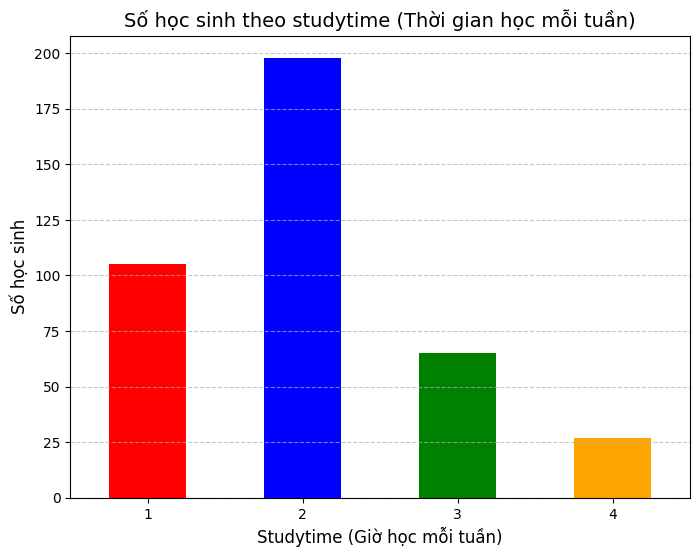

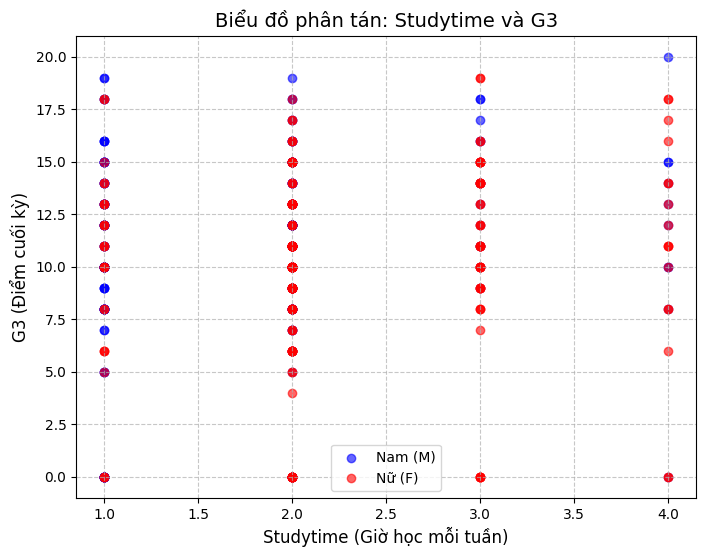

In [458]:
import pandas as pd
import matplotlib.pyplot as plt

# T√≠nh s·ªë l∆∞·ª£ng h·ªçc sinh theo studytime
studytime_counts = Student_Pandas['studytime'].value_counts().sort_index()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8, 6))
studytime_counts.plot(kind='bar', color=['red', 'blue', 'green', 'orange'])

# Thi·∫øt l·∫≠p ti√™u ƒë·ªÅ v√† nh√£n tr·ª•c
plt.title('S·ªë h·ªçc sinh theo studytime (Th·ªùi gian h·ªçc m·ªói tu·∫ßn)', fontsize=14)
plt.xlabel('Studytime (Gi·ªù h·ªçc m·ªói tu·∫ßn)', fontsize=12)
plt.ylabel('S·ªë h·ªçc sinh', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n t√°n gi·ªØa studytime v√† G3, ph√¢n bi·ªát nam (M) v√† n·ªØ (F) b·∫±ng m√†u s·∫Øc kh√°c nhau
plt.figure(figsize=(8, 6))

# L·ªçc d·ªØ li·ªáu cho nam v√† n·ªØ
male_data = Student_Pandas[Student_Pandas['sex'] == 'M']
female_data = Student_Pandas[Student_Pandas['sex'] == 'F']

# V·∫Ω ƒëi·ªÉm cho nam v√† n·ªØ
plt.scatter(male_data['studytime'], male_data['G3'], color='blue', label='Nam (M)', alpha=0.6)
plt.scatter(female_data['studytime'], female_data['G3'], color='red', label='N·ªØ (F)', alpha=0.6)

# Thi·∫øt l·∫≠p ti√™u ƒë·ªÅ v√† nh√£n tr·ª•c
plt.title('Bi·ªÉu ƒë·ªì ph√¢n t√°n: Studytime v√† G3', fontsize=14)
plt.xlabel('Studytime (Gi·ªù h·ªçc m·ªói tu·∫ßn)', fontsize=12)
plt.ylabel('G3 (ƒêi·ªÉm cu·ªëi k·ª≥)', fontsize=12)

# Hi·ªÉn th·ªã ch√∫ th√≠ch
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

## D·ª±a v√†o bi·ªÉu ƒë·ªì c·ªôt (barplot), em c√≥ th·ªÉ r√∫t ra m·ªôt s·ªë nh·∫≠n x√©t chi ti·∫øt v·ªÅ ph√¢n b·ªë th·ªùi gian h·ªçc c·ªßa h·ªçc sinh trong b·ªô d·ªØ li·ªáu n√†y:
1. Th·ªùi gian h·ªçc trung b√¨nh l√† 2 gi·ªù m·ªói tu·∫ßn (studytime = 2): ƒê√¢y l√† m·ª©c th·ªùi gian h·ªçc ph·ªï bi·∫øn nh·∫•t, v·ªõi s·ªë h·ªçc sinh chi·∫øm kho·∫£ng 200 ng∆∞·ªùi. ƒêi·ªÅu n√†y cho th·∫•y ph·∫ßn l·ªõn h·ªçc sinh trong b·ªô d·ªØ li·ªáu n√†y c√≥ m·ªôt l·ªãch h·ªçc ·ªïn ƒë·ªãnh, kh√¥ng qu√° √≠t c≈©ng kh√¥ng qu√° nhi·ªÅu. C√≥ th·ªÉ l√Ω do l√† h·ªçc sinh c√≥ ƒë·ªß th·ªùi gian ƒë·ªÉ h·ªçc t·∫≠p nh∆∞ng v·∫´n duy tr√¨ ƒë∆∞·ª£c s·ª± c√¢n b·∫±ng v·ªõi c√°c ho·∫°t ƒë·ªông kh√°c trong cu·ªôc s·ªëng nh∆∞ th·ªÉ thao, gi·∫£i tr√≠ hay tham gia c√°c c√¢u l·∫°c b·ªô x√£ h·ªôi. Th·ªùi gian h·ªçc n√†y c√≥ th·ªÉ ph·∫£n √°nh m·ªôt chi·∫øn l∆∞·ª£c h·ªçc t·∫≠p hi·ªáu qu·∫£ v√† h·ª£p l√Ω, gi√∫p h·ªçc sinh c√≥ th·ªÉ n·∫Øm v·ªØng ki·∫øn th·ª©c m√† kh√¥ng c·∫£m th·∫•y qu√° cƒÉng th·∫≥ng hay ki·ªát s·ª©c.
2. Th·ªùi gian h·ªçc √≠t (studytime = 1): S·ªë l∆∞·ª£ng h·ªçc sinh ·ªü m·ª©c n√†y t∆∞∆°ng ƒë·ªëi nh·ªè, ch·ªâ kho·∫£ng 100 h·ªçc sinh. ƒê√¢y c√≥ th·ªÉ l√† nh√≥m h·ªçc sinh kh√¥ng ƒë·∫ßu t∆∞ nhi·ªÅu th·ªùi gian v√†o vi·ªác h·ªçc m·ªói tu·∫ßn, c√≥ th·ªÉ do m·ªôt s·ªë l√Ω do nh∆∞: c√°c em c√≥ th·ªÉ ch∆∞a nh·∫≠n th·ª©c ƒë∆∞·ª£c t·∫ßm quan tr·ªçng c·ªßa vi·ªác h·ªçc, ho·∫∑c c√°c em c√≥ th·ªÉ ƒëang g·∫∑p ph·∫£i c√°c v·∫•n ƒë·ªÅ kh√°c trong cu·ªôc s·ªëng c√° nh√¢n nh∆∞ gia ƒë√¨nh, s·ª©c kh·ªèe, hay c√°c ho·∫°t ƒë·ªông ngo·∫°i kh√≥a chi·∫øm nhi·ªÅu th·ªùi gian. M·ªôt l√Ω do kh√°c c√≥ th·ªÉ l√† c√°c h·ªçc sinh n√†y d·ª±a v√†o s·ª± h·ªó tr·ª£ ngo√†i gi·ªù h·ªçc nh∆∞ gia s∆∞ ho·∫∑c h·ªçc nh√≥m, ho·∫∑c ƒë∆°n gi·∫£n l√† h·ªç ch∆∞a t√¨m ƒë∆∞·ª£c ph∆∞∆°ng ph√°p h·ªçc ph√π h·ª£p. Vi·ªác h·ªçc √≠t c√≥ th·ªÉ l√†m gi·∫£m c∆° h·ªôi th√†nh c√¥ng trong h·ªçc t·∫≠p n·∫øu kh√¥ng c√≥ c√°c ph∆∞∆°ng ph√°p h·ªçc hi·ªáu qu·∫£ kh√°c ƒëi k√®m.
3. Th·ªùi gian h·ªçc nhi·ªÅu (studytime = 3 ho·∫∑c 4): S·ªë l∆∞·ª£ng h·ªçc sinh c√≥ th·ªùi gian h·ªçc tr√™n 2 gi·ªù m·ªói tu·∫ßn l√† kh√° √≠t, v·ªõi kho·∫£ng 50-60 h·ªçc sinh. ƒêi·ªÅu n√†y c√≥ th·ªÉ ch·ªâ ra r·∫±ng c√≥ m·ªôt nh√≥m h·ªçc sinh nghi√™m t√∫c v√† chƒÉm ch·ªâ h∆°n trong vi·ªác h·ªçc, c√≥ th·ªÉ h·ªç c√≥ m·ª•c ti√™u h·ªçc t·∫≠p r√µ r√†ng v√† s·∫µn s√†ng d√†nh nhi·ªÅu th·ªùi gian cho vi·ªác h·ªçc ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c k·∫øt qu·∫£ t·ªët h∆°n. Tuy nhi√™n, vi·ªác h·ªçc qu√° nhi·ªÅu gi·ªù m·ªôt tu·∫ßn c≈©ng c·∫ßn ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh h·ª£p l√Ω, v√¨ n·∫øu kh√¥ng c√≥ s·ª± c√¢n b·∫±ng gi·ªØa h·ªçc v√† ngh·ªâ ng∆°i, c√°c h·ªçc sinh n√†y c√≥ th·ªÉ g·∫∑p ph·∫£i t√¨nh tr·∫°ng cƒÉng th·∫≥ng, m·ªát m·ªèi v√† gi·∫£m hi·ªáu qu·∫£ h·ªçc t·∫≠p.
### L√Ω do c√≥ √≠t h·ªçc sinh h·ªçc √≠t (studytime = 1):
M·ªôt l√Ω do c√≥ th·ªÉ cho vi·ªác h·ªçc √≠t l√† h·ªçc sinh thi·∫øu s·ª± ƒë·ªông vi√™n, thi·∫øu ƒë·ªông l·ª±c h·ªçc t·∫≠p. M·ªôt s·ªë h·ªçc sinh c√≥ th·ªÉ ch∆∞a nh·∫≠n th·ª©c ƒë∆∞·ª£c t·∫ßm quan tr·ªçng c·ªßa vi·ªác h·ªçc ho·∫∑c kh√¥ng c√≥ s·ª± h∆∞·ªõng d·∫´n, h·ªó tr·ª£ ph√π h·ª£p t·ª´ gia ƒë√¨nh hay nh√† tr∆∞·ªùng. Ngo√†i ra, c√°c y·∫øu t·ªë kh√°c nh∆∞ ƒëi·ªÅu ki·ªán gia ƒë√¨nh kh√≥ khƒÉn, thi·∫øu s·ª± quan t√¢m t·ª´ gia ƒë√¨nh, ho·∫∑c m√¥i tr∆∞·ªùng h·ªçc t·∫≠p kh√¥ng thu·∫≠n l·ª£i c≈©ng c√≥ th·ªÉ d·∫´n ƒë·∫øn vi·ªác h·ªçc kh√¥ng hi·ªáu qu·∫£. Nh·ªØng h·ªçc sinh n√†y c√≥ th·ªÉ g·∫∑p ph·∫£i nh·ªØng v·∫•n ƒë·ªÅ nh∆∞ thi·∫øu ph∆∞∆°ng ph√°p h·ªçc t·∫≠p ƒë√∫ng ƒë·∫Øn, c·∫£m th·∫•y vi·ªác h·ªçc qu√° s·ª©c, ho·∫∑c ƒë∆°n gi·∫£n l√† ch∆∞a bi·∫øt c√°ch t·ª± h·ªçc. Vi·ªác thi·∫øu th·ªùi gian h·ªçc t·∫≠p c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p c·ªßa c√°c em trong d√†i h·∫°n n·∫øu kh√¥ng c√≥ s·ª± can thi·ªáp k·ªãp th·ªùi t·ª´ gi√°o vi√™n ho·∫∑c c√°c y·∫øu t·ªë h·ªó tr·ª£ kh√°c.
#### K·∫øt lu·∫≠n:
Nh√¨n chung, bi·ªÉu ƒë·ªì n√†y cho th·∫•y s·ª± ph√¢n b·ªë th·ªùi gian h·ªçc t·∫≠p c·ªßa h·ªçc sinh kh√° ƒëa d·∫°ng, v·ªõi ph·∫ßn l·ªõn h·ªçc sinh d√†nh kho·∫£ng 2 gi·ªù h·ªçc m·ªói tu·∫ßn. Tuy nhi√™n, v·∫´n c√≥ nh·ªØng nh√≥m h·ªçc sinh h·ªçc √≠t ho·∫∑c h·ªçc nhi·ªÅu, v√† ƒëi·ªÅu n√†y ph·∫£n √°nh s·ª± kh√°c bi·ªát trong ph∆∞∆°ng ph√°p h·ªçc t·∫≠p, ƒë·ªông l·ª±c h·ªçc, v√† c√°c y·∫øu t·ªë t√°c ƒë·ªông t·ª´ m√¥i tr∆∞·ªùng s·ªëng v√† h·ªçc t·∫≠p c·ªßa m·ªói h·ªçc sinh. C·∫ßn ph·∫£i c√≥ s·ª± h·ªó tr·ª£ v√† h∆∞·ªõng d·∫´n c·ª• th·ªÉ ƒë·ªÉ c√°c h·ªçc sinh c√≥ th·ªÉ t·ªëi ∆∞u h√≥a th·ªùi gian h·ªçc t·∫≠p c·ªßa m√¨nh, ƒë·∫∑c bi·ªát l√† nh·ªØng h·ªçc sinh h·ªçc √≠t ƒë·ªÉ h·ªç c√≥ th·ªÉ n√¢ng cao k·∫øt qu·∫£ h·ªçc t·∫≠p trong t∆∞∆°ng lai.


## Bi·ªÉu ƒë·ªì ph√¢n t√°n (scatter plot) n√†y cho th·∫•y s·ª± li√™n h·ªá gi·ªØa th·ªùi gian h·ªçc m·ªói tu·∫ßn (studytime) v√† ƒëi·ªÉm thi cu·ªëi k·ª≥ (G3) c·ªßa h·ªçc sinh, ƒë·ªìng th·ªùi ph√¢n bi·ªát gi·ªØa h·ªçc sinh nam (M) v√† n·ªØ (F) b·∫±ng m√†u s·∫Øc kh√°c nhau (xanh d∆∞∆°ng cho nam v√† ƒë·ªè cho n·ªØ).
1. S·ª± ph√¢n b·ªï ƒëi·ªÉm thi (G3) theo th·ªùi gian h·ªçc (studytime):
- Nh√¨n chung, ƒëi·ªÉm thi cu·ªëi k·ª≥ (G3) c·ªßa c√°c h·ªçc sinh c√≥ s·ª± thay ƒë·ªïi nh·∫•t ƒë·ªãnh t√πy thu·ªôc v√†o th·ªùi gian h·ªçc m·ªói tu·∫ßn (studytime). T·ª´ bi·ªÉu ƒë·ªì, ta c√≥ th·ªÉ th·∫•y r·∫±ng c√°c h·ªçc sinh c√≥ studytime = 1 (1 gi·ªù h·ªçc m·ªói tu·∫ßn) c√≥ ƒëi·ªÉm thi kh√° th·∫•p, ƒëa s·ªë r∆°i v√†o kho·∫£ng t·ª´ 0 ƒë·∫øn 5 ƒëi·ªÉm. ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh r·∫±ng h·ªçc sinh d√†nh √≠t th·ªùi gian cho vi·ªác h·ªçc c√≥ k·∫øt qu·∫£ kh√¥ng t·ªët trong k·ª≥ thi cu·ªëi k·ª≥.
- V·ªõi studytime = 2 (2 gi·ªù h·ªçc m·ªói tu·∫ßn), c√≥ s·ª± c·∫£i thi·ªán r√µ r·ªát trong ƒëi·ªÉm thi (G3), ƒëi·ªÉm s·ªë dao ƒë·ªông t·ª´ kho·∫£ng 5 ƒë·∫øn 17. Tuy nhi√™n, v·∫´n c√≥ s·ª± ph√¢n t√°n r·ªông, cho th·∫•y r·∫±ng ch·ªâ vi·ªác h·ªçc √≠t gi·ªù m·ªói tu·∫ßn kh√¥ng ƒë·∫£m b·∫£o ch·∫Øc ch·∫Øn cho vi·ªác ƒë·∫°t ƒë∆∞·ª£c ƒëi·ªÉm cao.
- C√°c h·ªçc sinh c√≥ studytime = 3 v√† studytime = 4 (3 v√† 4 gi·ªù h·ªçc m·ªói tu·∫ßn) th∆∞·ªùng c√≥ ƒëi·ªÉm thi cao h∆°n, v·ªõi nhi·ªÅu h·ªçc sinh ƒë·∫°t t·ª´ 10 ƒë·∫øn 20 ƒëi·ªÉm. Tuy nhi√™n, ƒëi·ªÉm s·ªë v·∫´n c√≥ s·ª± ph√¢n t√°n l·ªõn, ƒëi·ªÅu n√†y cho th·∫•y r·∫±ng y·∫øu t·ªë ngo√†i th·ªùi gian h·ªçc nh∆∞ ph∆∞∆°ng ph√°p h·ªçc t·∫≠p, s·ª± chu·∫©n b·ªã v√† kh·∫£ nƒÉng ti·∫øp thu ki·∫øn th·ª©c c≈©ng c√≥ ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p.
2. S·ª± kh√°c bi·ªát gi·ªØa h·ªçc sinh nam (M) v√† n·ªØ (F):
- H·ªçc sinh nam (M) c√≥ ƒëi·ªÉm thi (G3) kh√° ·ªïn ƒë·ªãnh ·ªü m·ª©c ƒëi·ªÉm trung b√¨nh (10-17 ƒëi·ªÉm), nh∆∞ng kh√¥ng c√≥ s·ª± c·∫£i thi·ªán ƒë√°ng k·ªÉ ·ªü nh·ªØng h·ªçc sinh h·ªçc nhi·ªÅu h∆°n 2 gi·ªù.
- H·ªçc sinh n·ªØ (F) c√≥ xu h∆∞·ªõng c√≥ ƒëi·ªÉm thi cao h∆°n so v·ªõi h·ªçc sinh nam trong c√πng m·ª©c studytime. M·ªôt s·ªë h·ªçc sinh n·ªØ c√≥ th·ªÉ ƒë·∫°t ƒëi·ªÉm g·∫ßn 20 trong khi m·ªôt s·ªë h·ªçc sinh nam c√≥ ƒëi·ªÉm d∆∞·ªõi 5. ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh s·ª± kh√°c bi·ªát trong c√°ch ti·∫øp c·∫≠n v√† chi·∫øn l∆∞·ª£c h·ªçc t·∫≠p gi·ªØa hai gi·ªõi.
### Xu h∆∞·ªõng chung:
Bi·ªÉu ƒë·ªì n√†y cho th·∫•y m·ªôt xu h∆∞·ªõng r√µ r·ªát: Th·ªùi gian h·ªçc nhi·ªÅu h∆°n c√≥ xu h∆∞·ªõng c·∫£i thi·ªán ƒëi·ªÉm thi. Tuy nhi√™n, vi·ªác h·ªçc nhi·ªÅu gi·ªù kh√¥ng ph·∫£i l√∫c n√†o c≈©ng ƒë·∫£m b·∫£o ƒëi·ªÉm thi cao, v√† s·ª± ph√¢n t√°n c·ªßa ƒëi·ªÉm s·ªë ·ªü c√°c m·ª©c studytime c≈©ng cho th·∫•y r·∫±ng nh·ªØng y·∫øu t·ªë kh√°c nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, s·ª± ch·ªß ƒë·ªông, v√† th·∫≠m ch√≠ l√† s·ª± h·ªó tr·ª£ t·ª´ gia ƒë√¨nh hay b·∫°n b√® c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p.
#### K·∫øt lu·∫≠n:
Bi·ªÉu ƒë·ªì ph√¢n t√°n n√†y cho th·∫•y m·ªôt m·ªëi quan h·ªá t√≠ch c·ª±c gi·ªØa studytime v√† G3 nh∆∞ng kh√¥ng ph·∫£i l√† m·ªôt m·ªëi quan h·ªá ho√†n to√†n tuy·∫øn t√≠nh. Th·ªùi gian h·ªçc l√¢u h∆°n c√≥ th·ªÉ gi√∫p c·∫£i thi·ªán ƒëi·ªÉm s·ªë, nh∆∞ng ƒëi·ªÅu quan tr·ªçng l√† ph·∫£i k·∫øt h·ª£p v·ªõi ph∆∞∆°ng ph√°p h·ªçc t·∫≠p h·ª£p l√Ω v√† kh·∫£ nƒÉng ti·∫øp thu ki·∫øn th·ª©c. Bi·ªÉu ƒë·ªì c≈©ng ph·∫£n √°nh s·ª± kh√°c bi·ªát trong k·∫øt qu·∫£ h·ªçc t·∫≠p gi·ªØa nam v√† n·ªØ, m·∫∑c d√π m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa th·ªùi gian h·ªçc c√≥ th·ªÉ kh√¥ng gi·ªëng nhau gi·ªØa hai nh√≥m n√†y.


## Seaborn:

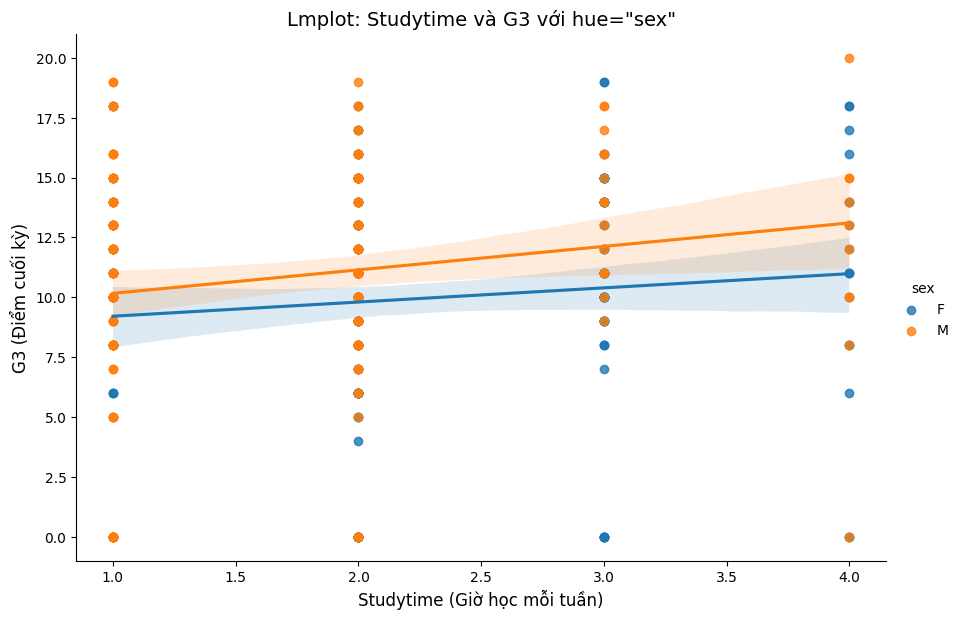

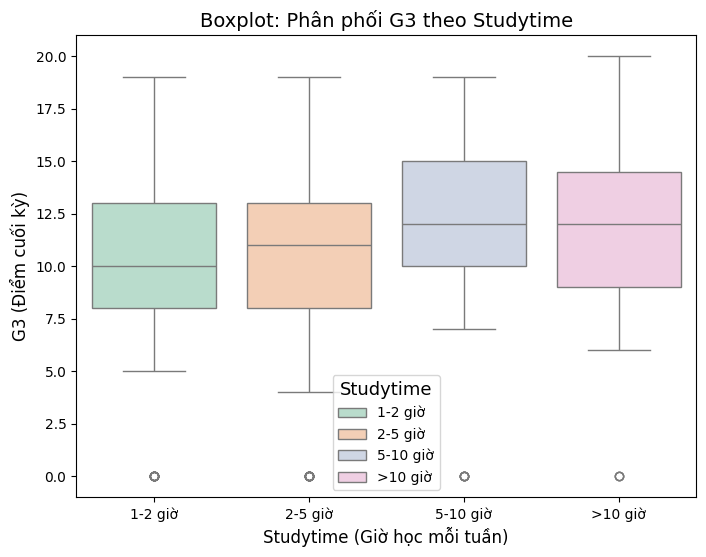

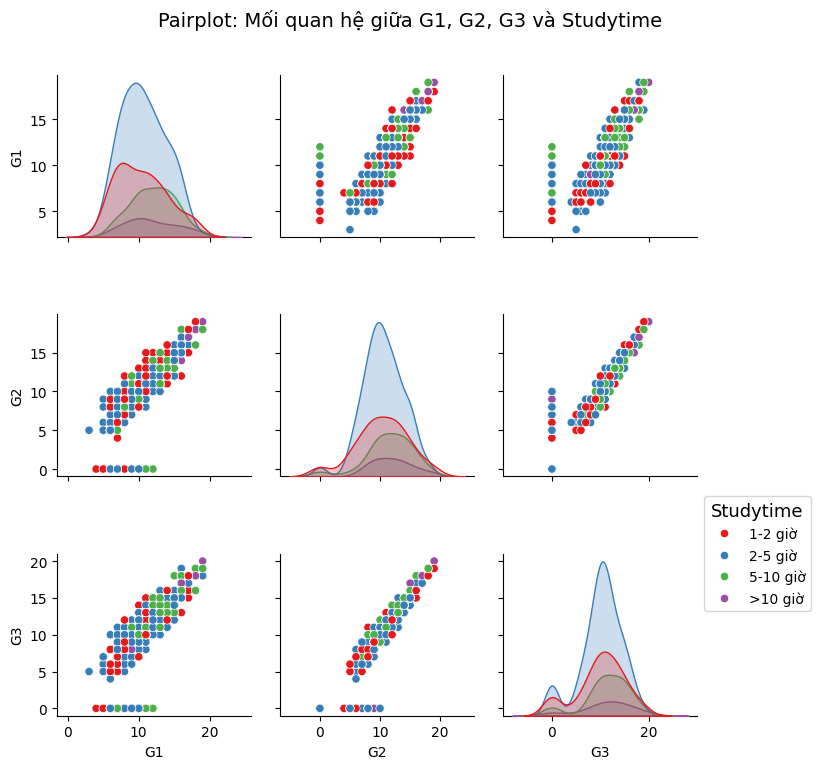

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lo·∫°i b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã NaN trong c√°c c·ªôt c·∫ßn v·∫Ω
filtered_data = Student_Pandas[['G1', 'G2', 'G3', 'studytime']].dropna()

# V·∫Ω lmplot: studytime v√† G3 v·ªõi hue='sex'
sns.lmplot(x='studytime', y='G3', data=Student_Pandas, hue='sex', aspect=1.5, height=6)
plt.title('Lmplot: Studytime v√† G3 v·ªõi hue="sex"', fontsize=14)
plt.xlabel('Studytime (Gi·ªù h·ªçc m·ªói tu·∫ßn)', fontsize=12)
plt.ylabel('G3 (ƒêi·ªÉm cu·ªëi k·ª≥)', fontsize=12)
plt.show()

# ƒê·ªãnh nghƒ©a legend_labels cho c√°c gi√° tr·ªã c·ªßa studytime
legend_labels = {1: '1-2 gi·ªù', 2: '2-5 gi·ªù', 3: '5-10 gi·ªù', 4: '>10 gi·ªù'}
# V·∫Ω boxplot: Ph√¢n ph·ªëi G3 theo studytime v·ªõi m√†u s·∫Øc t√πy ch·ªânh
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=Student_Pandas, hue='studytime', palette='Pastel2')
plt.title('Boxplot: Ph√¢n ph·ªëi G3 theo Studytime', fontsize=14)
# C·∫≠p nh·∫≠t nh√£n cho c√°c gi√° tr·ªã c·ªßa studytime
plt.xticks(ticks=[0, 1, 2, 3], labels=[legend_labels[i] for i in range(1, 5)], rotation=0)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title='Studytime', title_fontsize='13', loc='lower center', fontsize='10')
plt.xlabel('Studytime (Gi·ªù h·ªçc m·ªói tu·∫ßn)', fontsize=12)
plt.ylabel('G3 (ƒêi·ªÉm cu·ªëi k·ª≥)', fontsize=12)
plt.show()

# V·∫Ω pairplot: M·ªëi quan h·ªá gi·ªØa G1, G2, G3, studytime
g = sns.pairplot(filtered_data, hue='studytime', palette='Set1')
plt.suptitle('Pairplot: M·ªëi quan h·ªá gi·ªØa G1, G2, G3 v√† Studytime', fontsize=14, y=1.02)
handles, labels = g._legend_data.values(), g._legend_data.keys()
new_labels = [legend_labels[int(label)] for label in labels]
g._legend.remove()
plt.legend(handles, new_labels, title='Studytime', title_fontsize='13', 
           loc='center left', bbox_to_anchor=(1, 1), fontsize='10')
plt.tight_layout()  # Gi√∫p tr√°nh b·ªã tr√πng l·∫∑p layout khi ƒë·∫∑t legend ngo√†i
plt.show()

## D·ª±a v√†o bi·ªÉu ƒë·ªì lmplot gi·ªØa studytime (th·ªùi gian h·ªçc m·ªói tu·∫ßn) v√† G3 (ƒëi·ªÉm cu·ªëi k·ª≥) v·ªõi ph√¢n bi·ªát theo gi·ªõi t√≠nh (hue = "sex"), em c√≥ th·ªÉ ƒë∆∞a ra m·ªôt s·ªë nh·∫≠n x√©t nh∆∞ sau:
1. M·ªëi quan h·ªá gi·ªØa th·ªùi gian h·ªçc v√† ƒëi·ªÉm cu·ªëi k·ª≥ (G3):
- Bi·ªÉu ƒë·ªì cho th·∫•y xu h∆∞·ªõng chung l√† khi th·ªùi gian h·ªçc tƒÉng l√™n, ƒëi·ªÉm cu·ªëi k·ª≥ c≈©ng c√≥ xu h∆∞·ªõng tƒÉng nh·∫π. ƒêi·ªÅu n√†y h·ª£p l√Ω v√¨ vi·ªác h·ªçc t·∫≠p nhi·ªÅu h∆°n th∆∞·ªùng gi√∫p h·ªçc sinh n·∫Øm v·ªØng ki·∫øn th·ª©c h∆°n, t·ª´ ƒë√≥ c·∫£i thi·ªán k·∫øt qu·∫£ thi.
- Tuy nhi√™n, ƒë·ªô d·ªëc c·ªßa ƒë∆∞·ªùng h·ªìi quy kh√¥ng qu√° l·ªõn, nghƒ©a l√† m·∫∑c d√π h·ªçc nhi·ªÅu h∆°n c√≥ xu h∆∞·ªõng ƒëi·ªÉm cao h∆°n nh∆∞ng s·ª± c·∫£i thi·ªán ƒëi·ªÉm s·ªë kh√¥ng ph·∫£i l√† r·∫•t l·ªõn ho·∫∑c ngay l·∫≠p t·ª©c.
- Ngo√†i ra, s·ª± ph√¢n t√°n c√°c ƒëi·ªÉm d·ªØ li·ªáu xung quanh ƒë∆∞·ªùng h·ªìi quy c≈©ng cho th·∫•y r·∫±ng kh√¥ng ph·∫£i l√∫c n√†o h·ªçc nhi·ªÅu c≈©ng d·∫´n ƒë·∫øn ƒëi·ªÉm s·ªë cao; c√≤n c√≥ c√°c y·∫øu t·ªë kh√°c ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ nh∆∞ ch·∫•t l∆∞·ª£ng h·ªçc, ph∆∞∆°ng ph√°p h·ªçc, v√† kh·∫£ nƒÉng ti·∫øp thu c·ªßa h·ªçc sinh.
2. So s√°nh gi·ªØa h·ªçc sinh nam v√† n·ªØ:
- H·ªçc sinh nam (M) c√≥ xu h∆∞·ªõng c√≥ ƒëi·ªÉm trung b√¨nh cao h∆°n so v·ªõi h·ªçc sinh n·ªØ (F) ·ªü c√°c m·ª©c th·ªùi gian h·ªçc t∆∞∆°ng t·ª±, ƒë∆∞·ª£c th·ªÉ hi·ªán qua ƒë∆∞·ªùng h·ªìi quy c·ªßa nh√≥m nam cao h∆°n ƒë∆∞·ªùng h·ªìi quy c·ªßa nh√≥m n·ªØ.
- ƒêi·ªÅu n√†y c√≥ th·ªÉ ph·∫£n √°nh s·ª± kh√°c bi·ªát v·ªÅ c√°ch h·ªçc, c√°ch ti·∫øp c·∫≠n ki·∫øn th·ª©c ho·∫∑c s·ª± chƒÉm ch·ªâ gi·ªØa hai gi·ªõi, ho·∫∑c c≈©ng c√≥ th·ªÉ do ƒë·∫∑c ƒëi·ªÉm c√° nh√¢n, m√¥i tr∆∞·ªùng h·ªçc t·∫≠p, hay nh·ªØng y·∫øu t·ªë x√£ h·ªôi t√°c ƒë·ªông kh√°c.
- Tuy nhi√™n, s·ª± ch·ªìng l·∫•n c·ªßa c√°c ƒëi·ªÉm d·ªØ li·ªáu cho th·∫•y v·∫´n c√≥ nhi·ªÅu h·ªçc sinh n·ªØ ƒë·∫°t ƒëi·ªÉm cao ho·∫∑c th·∫•p t∆∞∆°ng ƒë∆∞∆°ng v·ªõi h·ªçc sinh nam, t·ª©c l√† s·ª± kh√°c bi·ªát kh√¥ng ph·∫£i l√∫c n√†o c≈©ng tuy·ªát ƒë·ªëi.
3. V·ªÅ nh√≥m h·ªçc sinh c√≥ th·ªùi gian h·ªçc √≠t (studytime = 1):
##### Nh·ªØng h·ªçc sinh d√†nh √≠t th·ªùi gian h·ªçc m·ªói tu·∫ßn th∆∞·ªùng c√≥ ƒëi·ªÉm cu·ªëi k·ª≥ kh√° th·∫•p, ho·∫∑c c√≥ nhi·ªÅu ƒëi·ªÉm g·∫ßn b·∫±ng 0, cho th·∫•y hi·ªáu qu·∫£ h·ªçc t·∫≠p th·∫•p. L√Ω do h·ª£p l√Ω ƒë·∫°i ƒë·∫°i cho t√¨nh tr·∫°ng h·ªçc √≠t n√†y c√≥ th·ªÉ l√†:
+ Thi·∫øu ƒë·ªông l·ª±c ho·∫∑c ch∆∞a nh·∫≠n th·ª©c ƒë∆∞·ª£c t·∫ßm quan tr·ªçng c·ªßa vi·ªác h·ªçc: M·ªôt s·ªë h·ªçc sinh c√≥ th·ªÉ ch∆∞a th·∫•y c·∫ßn thi·∫øt ph·∫£i ƒë·∫ßu t∆∞ nhi·ªÅu th·ªùi gian v√†o h·ªçc t·∫≠p v√¨ ch∆∞a c√≥ m·ª•c ti√™u r√µ r√†ng ho·∫∑c ch∆∞a g·∫∑p √°p l·ª±c h·ªçc t·∫≠p ƒë·ªß l·ªõn.
+ Ho·∫°t ƒë·ªông ngo·∫°i kh√≥a ho·∫∑c c√¥ng vi·ªác kh√°c chi·∫øm nhi·ªÅu th·ªùi gian: C√≥ th·ªÉ c√°c em tham gia nhi·ªÅu ho·∫°t ƒë·ªông th·ªÉ thao, ngh·ªá thu·∫≠t, ho·∫∑c th·∫≠m ch√≠ ƒëi l√†m th√™m, l√†m gi·∫£m th·ªùi gian d√†nh cho vi·ªác h·ªçc.
+ Ph∆∞∆°ng ph√°p h·ªçc ch∆∞a hi·ªáu qu·∫£ ho·∫∑c m√¥i tr∆∞·ªùng h·ªçc kh√¥ng thu·∫≠n l·ª£i: M·ªôt s·ªë h·ªçc sinh c√≥ th·ªÉ g·∫∑p kh√≥ khƒÉn trong vi·ªác t·∫≠p trung, kh√¥ng bi·∫øt c√°ch h·ªçc hi·ªáu qu·∫£, ho·∫∑c s·ªëng trong m√¥i tr∆∞·ªùng kh√¥ng c√≥ s·ª± h·ªó tr·ª£ ƒë·∫ßy ƒë·ªß.
+ V·∫•n ƒë·ªÅ c√° nh√¢n ho·∫∑c s·ª©c kh·ªèe: Nh·ªØng y·∫øu t·ªë nh∆∞ gia ƒë√¨nh, s·ª©c kh·ªèe kh√¥ng t·ªët c≈©ng c√≥ th·ªÉ khi·∫øn h·ªçc sinh kh√¥ng th·ªÉ d√†nh nhi·ªÅu th·ªùi gian h·ªçc.
##### T√¨nh tr·∫°ng n√†y n·∫øu k√©o d√†i c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ti√™u c·ª±c ƒë·∫øn th√†nh t√≠ch h·ªçc t·∫≠p v√† c∆° h·ªôi ph√°t tri·ªÉn trong t∆∞∆°ng lai c·ªßa c√°c em, n√™n c·∫ßn ƒë∆∞·ª£c quan t√¢m, h·ªó tr·ª£ t·ª´ gia ƒë√¨nh, nh√† tr∆∞·ªùng v√† x√£ h·ªôi.
4. K·∫øt lu·∫≠n chung:
- Bi·ªÉu ƒë·ªì lmplot gi√∫p ta h√¨nh dung ƒë∆∞·ª£c m·ªëi quan h·ªá t√≠ch c·ª±c nh∆∞ng kh√¥ng qu√° m·∫°nh gi·ªØa th·ªùi gian h·ªçc v√† ƒëi·ªÉm s·ªë, ƒë·ªìng th·ªùi ch·ªâ ra s·ª± kh√°c bi·ªát nh·∫•t ƒë·ªãnh v·ªÅ k·∫øt qu·∫£ h·ªçc t·∫≠p gi·ªØa nam v√† n·ªØ.
- M·∫∑c d√π h·ªçc nhi·ªÅu h∆°n c√≥ xu h∆∞·ªõng gi√∫p ƒëi·ªÉm s·ªë cao h∆°n, vi·ªác t·ªëi ∆∞u h√≥a k·∫øt qu·∫£ h·ªçc t·∫≠p c√≤n c·∫ßn ƒë·∫øn c√°c y·∫øu t·ªë kh√°c nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, s·ª± h·ªó tr·ª£, c≈©ng nh∆∞ ƒë·ªông l·ª±c c√° nh√¢n.
- ƒê·∫∑c bi·ªát, nh√≥m h·ªçc sinh h·ªçc √≠t c·∫ßn ƒë∆∞·ª£c quan t√¢m ƒë·ªÉ c·∫£i thi·ªán th√≥i quen h·ªçc t·∫≠p v√† t·∫°o ƒëi·ªÅu ki·ªán thu·∫≠n l·ª£i h∆°n cho qu√° tr√¨nh h·ªçc t·∫≠p c·ªßa c√°c em.


## D·ª±a v√†o bi·ªÉu ƒë·ªì boxplot th·ªÉ hi·ªán ph√¢n ph·ªëi ƒëi·ªÉm cu·ªëi k·ª≥ (G3) theo t·ª´ng m·ª©c th·ªùi gian h·ªçc m·ªói tu·∫ßn (studytime), em c√≥ th·ªÉ r√∫t ra m·ªôt s·ªë nh·∫≠n x√©t chi ti·∫øt nh∆∞ sau:
1. Ph√¢n ph·ªëi ƒëi·ªÉm G3 theo t·ª´ng nh√≥m studytime:
### Median (Trung v·ªã):
- ƒêi·ªÉm trung v·ªã c·ªßa c√°c nh√≥m studytime tƒÉng d·∫ßn t·ª´ nh√≥m 1 (kho·∫£ng 10 ƒëi·ªÉm) ƒë·∫øn nh√≥m 3 v√† 4 (kho·∫£ng 12 ƒëi·ªÉm). ƒêi·ªÅu n√†y cho th·∫•y r√µ xu h∆∞·ªõng chung: h·ªçc sinh d√†nh nhi·ªÅu th·ªùi gian h·ªçc h∆°n th√¨ ƒëi·ªÉm trung v·ªã cao h∆°n.
- Trung v·ªã ƒëi·ªÉm c·ªßa nh√≥m studytime 2 c≈©ng cao h∆°n nh√≥m 1 m·ªôt ch√∫t, cho th·∫•y vi·ªác tƒÉng th·ªùi gian h·ªçc c√≥ ·∫£nh h∆∞·ªüng t√≠ch c·ª±c ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p.
### Kho·∫£ng t·ª© ph√¢n v·ªã (IQR):
- Kho·∫£ng c√°ch gi·ªØa 25% v√† 75% (h·ªôp m√†u) c·ªßa c√°c nh√≥m studytime kh√° t∆∞∆°ng ƒë·ªìng, dao ƒë·ªông t·ª´ kho·∫£ng 7-8 ƒëi·ªÉm ƒë·∫øn kho·∫£ng 15 ƒëi·ªÉm.
- Nh√≥m studytime 3 c√≥ kho·∫£ng t·ª© ph√¢n v·ªã cao nh·∫•t, cho th·∫•y nh√≥m n√†y c√≥ s·ª± ƒëa d·∫°ng l·ªõn h∆°n v·ªÅ ƒëi·ªÉm s·ªë, c√≥ h·ªçc sinh ƒë·∫°t ƒëi·ªÉm r·∫•t cao v√† c≈©ng c√≥ nh·ªØng ng∆∞·ªùi th·∫•p h∆°n.
### Ph·∫°m vi (Whiskers):
C√°c nh√≥m ƒë·ªÅu c√≥ ph·∫°m vi ƒëi·ªÉm kh√° r·ªông, dao ƒë·ªông t·ª´ kho·∫£ng 5 ƒëi·ªÉm ƒë·∫øn g·∫ßn 20 ƒëi·ªÉm, cho th·∫•y s·ª± ƒëa d·∫°ng v·ªÅ k·∫øt qu·∫£ h·ªçc t·∫≠p trong t·ª´ng nh√≥m th·ªùi gian h·ªçc.
Ph·∫°m vi r·ªông n√†y ph·∫£n √°nh r·∫±ng d√π h·ªçc sinh c√≥ c√πng th·ªùi gian h·ªçc nh∆∞ng ƒëi·ªÉm s·ªë c√≥ th·ªÉ r·∫•t kh√°c nhau, c√≥ th·ªÉ do c√°c y·∫øu t·ªë nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, kh·∫£ nƒÉng ti·∫øp thu, ƒë·ªông l·ª±c c√° nh√¢n.
### Outliers (Gi√° tr·ªã ngo·∫°i lai):
M·ªói nh√≥m ƒë·ªÅu c√≥ m·ªôt s·ªë gi√° tr·ªã ngo·∫°i lai th·∫•p, t·ª©c l√† m·ªôt v√†i h·ªçc sinh ƒë·∫°t ƒëi·ªÉm r·∫•t th·∫•p (g·∫ßn ho·∫∑c b·∫±ng 0). ƒê√¢y c√≥ th·ªÉ l√† nh·ªØng h·ªçc sinh g·∫∑p kh√≥ khƒÉn nghi√™m tr·ªçng trong h·ªçc t·∫≠p ho·∫∑c c√≥ c√°c v·∫•n ƒë·ªÅ kh√°c nh∆∞ s·ª©c kh·ªèe, ho√†n c·∫£nh gia ƒë√¨nh, hay kh√¥ng tham gia h·ªçc ƒë·∫ßy ƒë·ªß.
2. √ù nghƒ©a t·ªïng th·ªÉ:
- Bi·ªÉu ƒë·ªì boxplot cho th·∫•y r√µ s·ª± c·∫£i thi·ªán ƒëi·ªÉm s·ªë trung b√¨nh v√† trung v·ªã khi th·ªùi gian h·ªçc tƒÉng l√™n, c·ªßng c·ªë th√™m quan ƒëi·ªÉm r·∫±ng th·ªùi gian h·ªçc l√† m·ªôt y·∫øu t·ªë quan tr·ªçng ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p.
- Tuy nhi√™n, s·ª± ph√¢n t√°n v√† xu·∫•t hi·ªán c√°c gi√° tr·ªã ngo·∫°i lai c≈©ng nh·∫•n m·∫°nh r·∫±ng vi·ªác h·ªçc nhi·ªÅu kh√¥ng ƒë·∫£m b·∫£o t·∫•t c·∫£ h·ªçc sinh ƒë·ªÅu c√≥ k·∫øt qu·∫£ t·ªët, v·∫´n c√≥ nhi·ªÅu y·∫øu t·ªë b√™n ngo√†i v√† c√° nh√¢n kh√°c t√°c ƒë·ªông ƒë·∫øn ƒëi·ªÉm s·ªë.
- C√°c gi√° tr·ªã ngo·∫°i lai th·∫•p c√≥ th·ªÉ l√† d·∫•u hi·ªáu c·∫£nh b√°o v·ªÅ nh·ªØng h·ªçc sinh c·∫ßn ƒë∆∞·ª£c quan t√¢m, h·ªó tr·ª£ th√™m ƒë·ªÉ c·∫£i thi·ªán hi·ªáu qu·∫£ h·ªçc t·∫≠p.
3. K·∫øt lu·∫≠n:
- Nh√¨n chung, bi·ªÉu ƒë·ªì boxplot th·ªÉ hi·ªán m·ªôt c√°ch tr·ª±c quan s·ª± ph√¢n b·ªë v√† bi·∫øn thi√™n ƒëi·ªÉm s·ªë theo c√°c nh√≥m th·ªùi gian h·ªçc kh√°c nhau, t·ª´ ƒë√≥ gi√∫p hi·ªÉu r√µ h∆°n m·ªëi quan h·ªá gi·ªØa th·ªùi gian h·ªçc v√† th√†nh t√≠ch h·ªçc t·∫≠p.
- Vi·ªác tƒÉng th·ªùi gian h·ªçc c√≥ xu h∆∞·ªõng ƒëem l·∫°i k·∫øt qu·∫£ t·ªët h∆°n, nh∆∞ng c≈©ng c·∫ßn l∆∞u √Ω ƒë·∫øn s·ª± ƒëa d·∫°ng trong k·∫øt qu·∫£ do c√°c y·∫øu t·ªë c√° nh√¢n v√† m√¥i tr∆∞·ªùng h·ªçc t·∫≠p kh√°c nhau.
- ƒê√¢y l√† c∆° s·ªü ƒë·ªÉ c√°c nh√† gi√°o d·ª•c, ph·ª• huynh v√† h·ªçc sinh c√≥ th·ªÉ c√¢n nh·∫Øc x√¢y d·ª±ng k·∫ø ho·∫°ch h·ªçc t·∫≠p h·ª£p l√Ω, ƒë·ªìng th·ªùi ch√∫ √Ω ƒë·∫øn c√°c h·ªçc sinh c√≥ k·∫øt qu·∫£ h·ªçc t·∫≠p y·∫øu ƒë·ªÉ c√≥ bi·ªán ph√°p h·ªó tr·ª£ k·ªãp th·ªùi.

## D·ª±a v√†o bi·ªÉu ƒë·ªì pairplot th·ªÉ hi·ªán m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn ƒëi·ªÉm s·ªë c√°c k·ª≥ h·ªçc (G1, G2, G3) v√† th·ªùi gian h·ªçc m·ªói tu·∫ßn (studytime), em c√≥ th·ªÉ r√∫t ra c√°c nh·∫≠n x√©t chi ti·∫øt nh∆∞ sau:
1. M·ªëi quan h·ªá gi·ªØa c√°c ƒëi·ªÉm s·ªë G1, G2 v√† G3:
- Bi·ªÉu ƒë·ªì ph√¢n t√°n ·ªü c√°c c·∫∑p bi·∫øn (G1 vs G2, G1 vs G3, G2 vs G3) cho th·∫•y c√≥ m·ªëi t∆∞∆°ng quan r·∫•t m·∫°nh v√† d∆∞∆°ng gi·ªØa c√°c ƒëi·ªÉm s·ªë k·ª≥ ƒë·∫ßu (G1), gi·ªØa k·ª≥ (G2) v√† cu·ªëi k·ª≥ (G3).
- ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† h·ªçc sinh c√≥ ƒëi·ªÉm cao ·ªü k·ª≥ ƒë·∫ßu v√† gi·ªØa k·ª≥ th∆∞·ªùng s·∫Ω c√≥ ƒëi·ªÉm cao ·ªü cu·ªëi k·ª≥, ph·∫£n √°nh s·ª± nh·∫•t qu√°n trong qu√° tr√¨nh h·ªçc t·∫≠p c·ªßa c√°c em.
- C√°c ƒëi·ªÉm d·ªØ li·ªáu t·∫≠p trung th√†nh c√°c c·ª•m d·ªçc theo ƒë∆∞·ªùng ch√©o t·ª´ d∆∞·ªõi tr√°i l√™n tr√™n ph·∫£i, cho th·∫•y s·ª± ƒë·ªìng thu·∫≠n trong s·ª± ph√°t tri·ªÉn ƒëi·ªÉm s·ªë qua c√°c k·ª≥.
2. Ph√¢n ph·ªëi c√°c ƒëi·ªÉm s·ªë theo t·ª´ng nh√≥m studytime:
- C√°c ƒë∆∞·ªùng m·∫≠t ƒë·ªô (density plots) ·ªü h√†ng ch√©o (tr·ª•c ch√≠nh) th·ªÉ hi·ªán ph√¢n ph·ªëi c·ªßa G1, G2 v√† G3 t∆∞∆°ng ·ª©ng v·ªõi t·ª´ng nh√≥m studytime ƒë∆∞·ª£c ƒë√°nh d·∫•u b·∫±ng m√†u s·∫Øc kh√°c nhau (ƒë·ªè, xanh d∆∞∆°ng, xanh l√°, t√≠m).
- Nh√≥m h·ªçc sinh c√≥ th·ªùi gian h·ªçc th·∫•p (studytime = 1, m√†u ƒë·ªè) c√≥ xu h∆∞·ªõng ph√¢n ph·ªëi ƒëi·ªÉm s·ªë d·ªìn v·ªÅ ph√≠a b√™n tr√°i, t·ª©c l√† ƒëi·ªÉm th·∫•p h∆°n so v·ªõi c√°c nh√≥m kh√°c.
- Ng∆∞·ª£c l·∫°i, c√°c nh√≥m studytime cao h∆°n (3 v√† 4) c√≥ ph√¢n ph·ªëi ƒëi·ªÉm d·ªãch chuy·ªÉn sang b√™n ph·∫£i, t·ª©c l√† c√≥ ƒëi·ªÉm s·ªë cao h∆°n, ƒë·∫∑c bi·ªát r√µ ·ªü G3. ƒê√¢y l√† minh ch·ª©ng tr·ª±c quan cho m·ªëi li√™n h·ªá t√≠ch c·ª±c gi·ªØa th·ªùi gian h·ªçc v√† k·∫øt qu·∫£ h·ªçc t·∫≠p.
3. M·ªëi quan h·ªá gi·ªØa studytime v√† c√°c ƒëi·ªÉm s·ªë:
M·∫∑c d√π ƒëi·ªÉm s·ªë G1, G2 v√† G3 ƒë·ªÅu c√≥ m·ªëi t∆∞∆°ng quan ch·∫∑t ch·∫Ω v·ªõi nhau, nh∆∞ng s·ª± ph√¢n t√°ch m√†u s·∫Øc theo studytime cho th·∫•y h·ªçc sinh h·ªçc nhi·ªÅu h∆°n c√≥ xu h∆∞·ªõng ƒë·∫°t ƒëi·ªÉm cao h∆°n, nh·∫•t l√† ·ªü k·ª≥ cu·ªëi (G3). ƒêi·ªÅu n√†y cho th·∫•y th·ªùi gian h·ªçc ·∫£nh h∆∞·ªüng t√≠ch c·ª±c ƒë·∫øn s·ª± ti·∫øn b·ªô v√† k·∫øt qu·∫£ cu·ªëi c√πng c·ªßa h·ªçc sinh.
4. T√≠nh ƒëa chi·ªÅu c·ªßa d·ªØ li·ªáu:
- Bi·ªÉu ƒë·ªì pairplot cho ph√©p quan s√°t ƒë·ªìng th·ªùi m·ªëi quan h·ªá song song gi·ªØa nhi·ªÅu bi·∫øn, gi√∫p nh·∫≠n ra r·∫±ng c√°c bi·∫øn ƒëi·ªÉm s·ªë k·ª≥ h·ªçc c√≥ t√≠nh ch·∫•t tuy·∫øn t√≠nh kh√° m·∫°nh v√† ƒë·ªìng nh·∫•t v·ªõi nhau.
- ƒê√¢y l√† c∆° s·ªü ƒë·ªÉ c√≥ th·ªÉ x√¢y d·ª±ng c√°c m√¥ h√¨nh d·ª± b√°o ƒëi·ªÉm cu·ªëi k·ª≥ G3 d·ª±a tr√™n ƒëi·ªÉm s·ªë c√°c k·ª≥ tr∆∞·ªõc v√† th·ªùi gian h·ªçc, ho·∫∑c c√°c ph√¢n t√≠ch n√¢ng cao kh√°c.

## Bokeh:

In [460]:
from bokeh.plotting import figure, show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, HoverTool, Slider
from bokeh.io import output_notebook
from bokeh.models.callbacks import CustomJS
import pandas as pd

# Prepare data for the plots
studytime_data = Student_Pandas['studytime'].value_counts().sort_index()  # Count of each studytime value

# Add color to the data
colors = ['red', 'blue', 'green', 'orange']
studytime_data_colored = studytime_data.reset_index()
studytime_data_colored.columns = ['studytime', 'count']  # Rename columns for clarity
studytime_data_colored['color'] = colors[:len(studytime_data_colored)]

# Create a ColumnDataSource with color column
bar_source = ColumnDataSource(studytime_data_colored)

# Bar chart for studytime distribution
bar_plot = figure(x_axis_label='Study Time', y_axis_label='Count', title="Bar chart: Studytime Distribution")
bar_plot.vbar(x='studytime', top='count', source=bar_source, width=0.9, color='color')

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("D:/nƒÉm 3/HK2/ph√¢n t√≠ch d·ªØ li·ªáu/student-mat.csv", sep=';')

# Chia d·ªØ li·ªáu theo gi·ªõi t√≠nh
df_male = df[df['sex'] == 'M']
df_female = df[df['sex'] == 'F']
source_male = ColumnDataSource(df_male)
source_female = ColumnDataSource(df_female)

# Bi·ªÉu ƒë·ªì ph√¢n t√°n
scatter = figure(title="Studytime v√† G3 theo gi·ªõi t√≠nh", tools="pan,wheel_zoom,box_zoom,reset")
r1 = scatter.scatter(x='studytime', y='G3', source=source_male, size=10, color='blue', legend_label='Nam')
r2 = scatter.scatter(x='studytime', y='G3', source=source_female, size=10, color='red', legend_label='N·ªØ')

# Th√™m HoverTool
hover = HoverTool(tooltips=[("Age", "@age"), ("Sex", "@sex"), ("Absences", "@absences")])
scatter.add_tools(hover)

# ƒê·∫∑t nh√£n cho c√°c tr·ª•c
scatter.xaxis.axis_label = "Studytime (1-4)"
scatter.yaxis.axis_label = "G3 Score"

# ƒê·∫∑t v·ªã tr√≠ v√† click_policy cho legend
scatter.legend.location = "bottom_center"  # V·ªã tr√≠ c·ªßa legend
scatter.legend.click_policy = "hide"  # Cho ph√©p ·∫©n/hi·ªán c√°c ƒëi·ªÉm theo nh√≥m trong legend

# Th√™m Slider ƒë·ªÉ l·ªçc studytime
slider = Slider(start=1, end=4, step=1, value=1, title="L·ªçc Studytime")
slider.js_on_change('value', CustomJS(args=dict(source_male=source_male, source_female=source_female, r1=r1, r2=r2), code="""
    const studytime_val = cb_obj.value; // L·∫•y gi√° tr·ªã t·ª´ slider
    const male_data = source_male.data;
    const female_data = source_female.data;
    
    // H√†m l·ªçc d·ªØ li·ªáu
    function filter_data(source) {
        const filtered = {studytime: [], G3: [], age: [], sex: [], absences: []};
        for (let i = 0; i < source['studytime'].length; i++) {
            if (source['studytime'][i] >= studytime_val) { // L·ªçc studytime theo gi√° tr·ªã slider
                filtered.studytime.push(source['studytime'][i]);
                filtered.G3.push(source['G3'][i]);
                filtered.age.push(source['age'][i]);
                filtered.sex.push(source['sex'][i]);
                filtered.absences.push(source['absences'][i]);
            }
        }
        return filtered;
    }
    
    // √Åp d·ª•ng b·ªô l·ªçc cho d·ªØ li·ªáu Nam v√† N·ªØ
    r1.data_source.data = filter_data(male_data);
    r2.data_source.data = filter_data(female_data);
"""))

# Combine the bar chart and scatter plot in a row layout
layout = column(bar_plot, scatter, slider)

# Display the layout
output_notebook()
show(layout)

Loading BokehJS ...

## D·ª±a v√†o bi·ªÉu ƒë·ªì bar chart v√† scatter plot v·ªÅ ph√¢n ph·ªëi th·ªùi gian h·ªçc (studytime) n√†y, em c√≥ th·ªÉ r√∫t ra nh·ªØng nh·∫≠n x√©t chi ti·∫øt v√† h·ª£p l√Ω nh∆∞ sau:
1. Ph√¢n b·ªë s·ªë l∆∞·ª£ng h·ªçc sinh theo m·ª©c th·ªùi gian h·ªçc:
- M·ª©c th·ªùi gian h·ªçc ph·ªï bi·∫øn nh·∫•t l√† 2 gi·ªù m·ªói tu·∫ßn (studytime = 2), v·ªõi s·ªë l∆∞·ª£ng h·ªçc sinh kho·∫£ng g·∫ßn 200 em. ƒêi·ªÅu n√†y cho th·∫•y ph·∫ßn l·ªõn h·ªçc sinh trong d·ªØ li·ªáu l·ª±a ch·ªçn d√†nh kho·∫£ng 2 gi·ªù m·ªói tu·∫ßn ƒë·ªÉ h·ªçc th√™m ngo√†i gi·ªù h·ªçc ch√≠nh kh√≥a.
- M·ª©c h·ªçc √≠t nh·∫•t l√† 1 gi·ªù m·ªói tu·∫ßn (studytime = 1), v·ªõi s·ªë l∆∞·ª£ng h·ªçc sinh kho·∫£ng h∆°n 100 em, chi·∫øm t·ª∑ l·ªá kh√° l·ªõn trong t·ªïng s·ªë.
- Th·ªùi gian h·ªçc 3 gi·ªù m·ªói tu·∫ßn c√≥ s·ªë l∆∞·ª£ng h·ªçc sinh th·∫•p h∆°n nhi·ªÅu, kho·∫£ng 70 em, v√† s·ªë h·ªçc sinh d√†nh 4 gi·ªù m·ªói tu·∫ßn h·ªçc t·∫≠p l√† √≠t nh·∫•t, ch·ªâ kho·∫£ng 25 em.
2. Nh·∫≠n x√©t v·ªÅ xu h∆∞·ªõng h·ªçc t·∫≠p:
-C√≥ th·ªÉ th·∫•y, ƒëa s·ªë h·ªçc sinh h·ªçc theo m·ª©c trung b√¨nh v√† th·∫•p (1 ƒë·∫øn 2 gi·ªù m·ªói tu·∫ßn), c√≤n nh√≥m h·ªçc sinh h·ªçc nhi·ªÅu (3-4 gi·ªù) chi·∫øm t·ª∑ l·ªá r·∫•t nh·ªè. ƒêi·ªÅu n√†y ph·∫£n √°nh m·ªôt xu h∆∞·ªõng chung trong h·ªçc sinh, khi nhi·ªÅu em ch·ªâ d√†nh m·ªôt kho·∫£ng th·ªùi gian v·ª´a ph·∫£i ƒë·ªÉ h·ªçc th√™m, c√≥ th·ªÉ v√¨ √°p l·ª±c h·ªçc t·∫≠p ch√≠nh kh√≥a ƒë√£ chi·∫øm ph·∫ßn l·ªõn th·ªùi gian, ho·∫∑c do c√°c y·∫øu t·ªë b√™n ngo√†i nh∆∞ ho·∫°t ƒë·ªông ngo·∫°i kh√≥a, ngh·ªâ ng∆°i, gi·∫£i tr√≠.
- S·ªë l∆∞·ª£ng h·ªçc sinh h·ªçc √≠t (1 gi·ªù) v·∫´n kh√° l·ªõn, ƒëi·ªÅu n√†y l√† m·ªôt ƒëi·ªÉm c·∫ßn l∆∞u √Ω trong ph√¢n t√≠ch v√† gi√°o d·ª•c, v√¨ th·ªùi gian h·ªçc qu√° √≠t c√≥ th·ªÉ ·∫£nh h∆∞·ªüng kh√¥ng t·ªët ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p.
3. L√Ω do ƒë·∫°i ƒë·∫°i v√† h·ª£p l√Ω cho vi·ªác h·ªçc √≠t:
- Thi·∫øu nh·∫≠n th·ª©c v·ªÅ t·∫ßm quan tr·ªçng c·ªßa vi·ªác h·ªçc th√™m: M·ªôt s·ªë h·ªçc sinh c√≥ th·ªÉ ch∆∞a th·ª±c s·ª± hi·ªÉu r·∫±ng vi·ªác d√†nh th√™m th·ªùi gian h·ªçc c√≥ th·ªÉ c·∫£i thi·ªán k·∫øt qu·∫£ h·ªçc t·∫≠p, d·∫´n ƒë·∫øn vi·ªác kh√¥ng t·∫≠p trung ho·∫∑c kh√¥ng ∆∞u ti√™n h·ªçc th√™m.
- √Åp l·ª±c t·ª´ nhi·ªÅu ph√≠a: H·ªçc sinh c√≥ th·ªÉ g·∫∑p √°p l·ª±c t·ª´ c√°c ho·∫°t ƒë·ªông kh√°c nh∆∞ th·ªÉ thao, ngh·ªá thu·∫≠t, ho·∫∑c c√°c c√¥ng vi·ªác gia ƒë√¨nh, l√†m th√™m, khi·∫øn th·ªùi gian d√†nh cho h·ªçc t·∫≠p b·ªã h·∫°n ch·∫ø.
- Ph∆∞∆°ng ph√°p h·ªçc kh√¥ng hi·ªáu qu·∫£: C√≥ th·ªÉ m·ªôt s·ªë em kh√¥ng bi·∫øt c√°ch t·ªï ch·ª©c th·ªùi gian h·ªçc sao cho hi·ªáu qu·∫£, ho·∫∑c c·∫£m th·∫•y h·ªçc t·∫≠p qu√° cƒÉng th·∫≥ng v√† kh√¥ng c√≥ ƒë·ªông l·ª±c.
- S·ª©c kh·ªèe ho·∫∑c ho√†n c·∫£nh c√° nh√¢n: C√°c v·∫•n ƒë·ªÅ v·ªÅ s·ª©c kh·ªèe, ho·∫∑c ho√†n c·∫£nh gia ƒë√¨nh kh√≥ khƒÉn c≈©ng c√≥ th·ªÉ l√† nguy√™n nh√¢n khi·∫øn h·ªçc sinh kh√¥ng th·ªÉ d√†nh nhi·ªÅu th·ªùi gian h·ªçc.
- H·ªçc sinh c√≥ th·ªÉ ƒëang h·ªçc b√π ho·∫∑c h·ªçc theo nh√≥m ngo√†i gi·ªù: M·ªôt s·ªë em d√π c√≥ th·ªùi gian h·ªçc √≠t trong tu·∫ßn nh∆∞ng l·∫°i c√≥ th·ªÉ h·ªçc th√™m c√°c bu·ªïi kh√°c kh√¥ng ƒë∆∞·ª£c ghi nh·∫≠n, ho·∫∑c nh·∫≠n h·ªó tr·ª£ t·ª´ gia s∆∞ ho·∫∑c b·∫°n b√®.
4. K·∫øt lu·∫≠n:
Bi·ªÉu ƒë·ªì bar chart n√†y ph·∫£n √°nh r√µ xu h∆∞·ªõng ph√¢n b·ªë th·ªùi gian h·ªçc c·ªßa h·ªçc sinh trong d·ªØ li·ªáu, v·ªõi ƒëa s·ªë h·ªçc sinh ch·ªçn h·ªçc ·ªü m·ª©c trung b√¨nh ho·∫∑c th·∫•p. Vi·ªác c√≥ m·ªôt l∆∞·ª£ng h·ªçc sinh kh√° l·ªõn h·ªçc √≠t l√† d·∫•u hi·ªáu c·∫ßn ƒë∆∞·ª£c ch√∫ √Ω ƒë·ªÉ nh√† tr∆∞·ªùng v√† gia ƒë√¨nh c√≥ th·ªÉ c√≥ c√°c bi·ªán ph√°p h·ªó tr·ª£, n√¢ng cao nh·∫≠n th·ª©c v√† t·∫°o ƒë·ªông l·ª±c h·ªçc t·∫≠p cho c√°c em. ƒê·ªìng th·ªùi c≈©ng n√™n khuy·∫øn kh√≠ch c√°c h·ªçc sinh h·ªçc nhi·ªÅu h∆°n trong m·ª©c h·ª£p l√Ω ƒë·ªÉ tƒÉng hi·ªáu qu·∫£ h·ªçc t·∫≠p.

# C√¥ng vi·ªác 3: Ki·ªÉm ƒë·ªãnh th·ªëng k√™ v·ªõi gi·∫£ thuy·∫øt

## 1. T-test

In [461]:
import pandas as pd
from scipy import stats

# Gi·∫£ s·ª≠ Student_Pandas l√† DataFrame c·ªßa b·∫°n
mean_absences = Student_Pandas['absences'].mean()

# T·∫°o hai nh√≥m d·ª±a tr√™n trung b√¨nh absences
group1 = Student_Pandas[Student_Pandas['absences'] > mean_absences]  # absences > trung b√¨nh
group2 = Student_Pandas[Student_Pandas['absences'] <= mean_absences]  # absences <= trung b√¨nh

# Th·ª±c hi·ªán t-test gi·ªØa hai nh√≥m
t_stat, p_value = stats.ttest_ind(group1['G3'], group2['G3'])

# B√°o c√°o k·∫øt qu·∫£
alpha = 0.05
if p_value < alpha:
    conclusion = "B√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: C√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ gi·ªØa ƒëi·ªÉm G3 c·ªßa hai nh√≥m."
else:
    conclusion = "Kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Kh√¥ng c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ gi·ªØa ƒëi·ªÉm G3 c·ªßa hai nh√≥m."

print(f"T-statistic: {t_stat}, p-value: {p_value}")
print(f"K·∫øt lu·∫≠n: {conclusion}")

T-statistic: 1.3982633522725831, p-value: 0.16282255783546729
K·∫øt lu·∫≠n: Kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Kh√¥ng c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ gi·ªØa ƒëi·ªÉm G3 c·ªßa hai nh√≥m.


## T·ª´ k·∫øt qu·∫£ tr√™n, ta c√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c T-statistic ~ 1.40 v√† p-value ~ 0.163, v·ªõi m·ª©c √Ω nghƒ©a ùõº = 0.05. 
- ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† kh√¥ng c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ gi·ªØa ƒëi·ªÉm G3 c·ªßa h·ªçc sinh c√≥ s·ªë ng√†y ngh·ªâ cao (absences > trung b√¨nh) v√† h·ªçc sinh c√≥ s·ªë ng√†y ngh·ªâ th·∫•p (absences ‚â§ trung b√¨nh). 
- K·∫øt qu·∫£ n√†y cho th·∫•y r·∫±ng s·ªë ng√†y ngh·ªâ kh√¥ng ph·∫£i l√† y·∫øu t·ªë duy nh·∫•t quy·∫øt ƒë·ªãnh ƒëi·ªÉm s·ªë c·ªßa h·ªçc sinh. C√≥ th·ªÉ c√°c y·∫øu t·ªë kh√°c nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, s·ª± t·∫≠p trung, ƒë·ªông l·ª±c c√° nh√¢n, hay m√¥i tr∆∞·ªùng h·ªçc t·∫≠p ƒë√≥ng vai tr√≤ quan tr·ªçng h∆°n trong vi·ªác ·∫£nh h∆∞·ªüng ƒë·∫øn ƒëi·ªÉm G3 c·ªßa h·ªçc sinh.
- K·∫øt qu·∫£ kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt null kh√¥ng c√≥ nghƒ©a l√† s·ªë ng√†y ngh·ªâ ho√†n to√†n kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn ƒëi·ªÉm G3, m√† ch·ªâ l√† kh√¥ng c√≥ ƒë·ªß b·∫±ng ch·ª©ng th·ªëng k√™ ƒë·ªÉ kh·∫≥ng ƒë·ªãnh r·∫±ng c√≥ s·ª± kh√°c bi·ªát gi·ªØa hai nh√≥m trong d·ªØ li·ªáu hi·ªán t·∫°i.

## 2. Z-test

In [462]:
# T√≠nh to√°n Z-test cho b√†i to√°n c·ªßa b·∫°n

# L·ªçc nh√≥m h·ªçc sinh c√≥ studytime <= 2
group_studytime_low = df[df['studytime'] <= 2]

# T√≠nh trung b√¨nh ƒëi·ªÉm G3 c·ªßa to√†n b·ªô h·ªçc sinh
mean_all = df['G3'].mean()

# T√≠nh trung b√¨nh ƒëi·ªÉm G3 c·ªßa nh√≥m h·ªçc sinh c√≥ studytime <= 2
mean_studytime_low = group_studytime_low['G3'].mean()

# T√≠nh ƒë·ªô l·ªách chu·∫©n c·ªßa nh√≥m h·ªçc sinh studytime <= 2
std_studytime_low = group_studytime_low['G3'].std()

# S·ªë l∆∞·ª£ng h·ªçc sinh trong nh√≥m studytime <= 2
n_studytime_low = group_studytime_low.shape[0]

# T√≠nh Z-value
z_value = (mean_studytime_low - mean_all) / (std_studytime_low / (n_studytime_low ** 0.5))

# T√≠nh p-value t·ª´ Z-value
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(z_value)))  # two-tailed test

# So s√°nh trung b√¨nh G3 c·ªßa nh√≥m h·ªçc sinh studytime <= 2 v·ªõi trung b√¨nh to√†n b·ªô h·ªçc sinh
if mean_studytime_low < mean_all:
    comparison = "Nh√≥m h·ªçc sinh studytime <= 2 c√≥ trung b√¨nh G3 th·∫•p h∆°n so v·ªõi to√†n b·ªô h·ªçc sinh."
elif mean_studytime_low > mean_all:
    comparison = "Nh√≥m h·ªçc sinh studytime <= 2 c√≥ trung b√¨nh G3 cao h∆°n so v·ªõi to√†n b·ªô h·ªçc sinh."
else:
    comparison = "Trung b√¨nh G3 c·ªßa nh√≥m h·ªçc sinh studytime <= 2 b·∫±ng v·ªõi trung b√¨nh to√†n b·ªô h·ªçc sinh."
    
# K·∫øt lu·∫≠n
alpha = 0.05
conclusion = "B√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Trung b√¨nh ƒëi·ªÉm G3 c·ªßa nh√≥m h·ªçc sinh h·ªçc √≠t kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi trung b√¨nh k·ª≥ v·ªçng." if p_value < alpha else "Kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Trung b√¨nh ƒëi·ªÉm G3 c·ªßa nh√≥m h·ªçc sinh h·ªçc √≠t kh√¥ng kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi trung b√¨nh k·ª≥ v·ªçng."

print(f"Trung b√¨nh G3 (studytime <= 2): {mean_studytime_low}, Trung b√¨nh G3 (all): {mean_all}")
print(f"So s√°nh v·ªõi trung b√¨nh to√†n b·ªô: ",comparison)
print(f"Z-value: {z_value}, p-value: {p_value}")
print(f"K·∫øt lu·∫≠n: {conclusion}")

Trung b√¨nh G3 (studytime <= 2): 10.128712871287128, Trung b√¨nh G3 (all): 10.415189873417722
So s√°nh v·ªõi trung b√¨nh to√†n b·ªô:  Nh√≥m h·ªçc sinh studytime <= 2 c√≥ trung b√¨nh G3 th·∫•p h∆°n so v·ªõi to√†n b·ªô h·ªçc sinh.
Z-value: -1.1132147357769346, p-value: 0.2656162153961641
K·∫øt lu·∫≠n: Kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Trung b√¨nh ƒëi·ªÉm G3 c·ªßa nh√≥m h·ªçc sinh h·ªçc √≠t kh√¥ng kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi trung b√¨nh k·ª≥ v·ªçng.


## T·ª´ k·∫øt qu·∫£ tr√™n ta c√≥ th·ªÉ th·∫•y p-value ~ 0.266 l·ªõn h∆°n m·ª©c √Ω nghƒ©a Œ±=0.05, ch√∫ng ta kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt null (H‚ÇÄ). ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† kh√¥ng c√≥ s·ª± kh√°c bi·ªát ƒë√°ng k·ªÉ gi·ªØa trung b√¨nh ƒëi·ªÉm G3 c·ªßa nh√≥m h·ªçc sinh c√≥ studytime ‚â§ 2 v√† trung b√¨nh ƒëi·ªÉm G3 c·ªßa to√†n b·ªô h·ªçc sinh.
- So s√°nh v·ªõi trung b√¨nh to√†n b·ªô: Trung b√¨nh ƒëi·ªÉm G3 c·ªßa nh√≥m h·ªçc sinh c√≥ studytime ‚â§ 2 th·∫•p h∆°n so v·ªõi to√†n b·ªô h·ªçc sinh. Tuy nhi√™n, do p-value > 0.05, ch√∫ng ta kh√¥ng th·ªÉ k·∫øt lu·∫≠n r·∫±ng s·ª± kh√°c bi·ªát n√†y l√† c√≥ √Ω nghƒ©a th·ªëng k√™.
- V·ªÅ l√Ω thuy·∫øt: M·∫∑c d√π nh√≥m h·ªçc sinh c√≥ studytime ‚â§ 2 c√≥ ƒëi·ªÉm trung b√¨nh th·∫•p h∆°n m·ªôt ch√∫t so v·ªõi to√†n b·ªô h·ªçc sinh, nh∆∞ng ki·ªÉm ƒë·ªãnh Z-test cho th·∫•y kh√¥ng c√≥ ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n r·∫±ng th·ªùi gian h·ªçc √≠t c√≥ ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn ƒëi·ªÉm G3.
- V·ªÅ th·ª±c ti·ªÖn: K·∫øt qu·∫£ n√†y g·ª£i √Ω r·∫±ng s·ª± kh√°c bi·ªát trong th·ªùi gian h·ªçc kh√¥ng ƒë·ªß l·ªõn ƒë·ªÉ t·∫°o ra s·ª± thay ƒë·ªïi ƒë√°ng k·ªÉ trong k·∫øt qu·∫£ h·ªçc t·∫≠p (ƒëi·ªÉm G3). Tuy nhi√™n, c·∫ßn l∆∞u √Ω r·∫±ng c√°c y·∫øu t·ªë kh√°c ngo√†i th·ªùi gian h·ªçc, ch·∫≥ng h·∫°n nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, s·ª± ch√∫ t√¢m, v√† c√°c y·∫øu t·ªë c√° nh√¢n, c√≥ th·ªÉ ·∫£nh h∆∞·ªüng nhi·ªÅu h∆°n ƒë·∫øn ƒëi·ªÉm s·ªë c·ªßa h·ªçc sinh.

## 3. Chi-square test

In [463]:
import pandas as pd
from scipy import stats

# T·∫°o bi·∫øn nh·ªã ph√¢n t·ª´ G3
Student_Pandas['G3_high'] = (Student_Pandas['G3'] >= 12).astype(int)  # Bi·∫øn nh·ªã ph√¢n (1 n·∫øu G3 >= 12, 0 n·∫øu G3 < 12)

# X√¢y d·ª±ng b·∫£ng t·∫ßn s·ªë (contingency table) gi·ªØa studytime v√† bi·∫øn nh·ªã ph√¢n G3
contingency_table = pd.crosstab(Student_Pandas['studytime'],Student_Pandas['G3_high'])

# Th·ª±c hi·ªán ki·ªÉm ƒë·ªãnh Chi-square
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# B√°o c√°o k·∫øt qu·∫£
alpha = 0.05  # M·ª©c √Ω nghƒ©a
if p_value_chi2 < alpha:
    conclusion_chi2 = "B√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: C√≥ m·ªëi quan h·ªá gi·ªØa m·ª©c th·ªùi gian h·ªçc v√† vi·ªác ƒë·∫°t ƒëi·ªÉm cao hay th·∫•p."
else:
    conclusion_chi2 = "Kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Kh√¥ng c√≥ m·ªëi quan h·ªá gi·ªØa m·ª©c th·ªùi gian h·ªçc v√† vi·ªác ƒë·∫°t ƒëi·ªÉm cao hay th·∫•p."

# In k·∫øt qu·∫£
print(f"B·∫£ng t·∫ßn s·ªë (Contingency Table):\n{contingency_table}")
print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_value_chi2}")
print(f"K·∫øt lu·∫≠n: {conclusion_chi2}")

B·∫£ng t·∫ßn s·ªë (Contingency Table):
G3_high      0   1
studytime         
1           61  44
2          127  71
3           32  33
4           13  14
Chi-square Statistic: 6.077519239112519, p-value: 0.10789905479478563
K·∫øt lu·∫≠n: Kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ: Kh√¥ng c√≥ m·ªëi quan h·ªá gi·ªØa m·ª©c th·ªùi gian h·ªçc v√† vi·ªác ƒë·∫°t ƒëi·ªÉm cao hay th·∫•p.


## T·ª´ k·∫øt qu·∫£ tr√™n, ch√∫ng ta c√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c: Chi-square statistic ~ 6.078 v√† p-value ~ 0.108. V√¨ p-value = 0.183 l·ªõn h∆°n 0.05, kh√¥ng b√°c b·ªè gi·∫£ thuy·∫øt H‚ÇÄ. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† kh√¥ng c√≥ m·ªëi quan h·ªá ƒë√°ng k·ªÉ gi·ªØa m·ª©c th·ªùi gian h·ªçc (studytime) v√† vi·ªác ƒë·∫°t ƒëi·ªÉm cao (G3 ‚â• 12) hay th·∫•p (G3 < 12) trong m·∫´u d·ªØ li·ªáu n√†y.
- V·ªÅ l√Ω thuy·∫øt: M·∫∑c d√π nhi·ªÅu ng∆∞·ªùi nghƒ© r·∫±ng h·ªçc sinh c√≥ th·ªùi gian h·ªçc nhi·ªÅu s·∫Ω ƒë·∫°t ƒëi·ªÉm cao h∆°n, k·∫øt qu·∫£ ki·ªÉm ƒë·ªãnh Chi-square cho th·∫•y kh√¥ng c√≥ m·ªëi quan h·ªá r√µ r√†ng gi·ªØa m·ª©c th·ªùi gian h·ªçc v√† vi·ªác ƒë·∫°t ƒëi·ªÉm cao ho·∫∑c th·∫•p. ƒêi·ªÅu n√†y c√≥ th·ªÉ ch·ªâ ra r·∫±ng c√°c y·∫øu t·ªë kh√°c, ch·∫≥ng h·∫°n nh∆∞ ph∆∞∆°ng ph√°p h·ªçc, s·ª± t·∫≠p trung, v√† c√°c y·∫øu t·ªë c√° nh√¢n, c≈©ng c√≥ ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn ƒëi·ªÉm s·ªë ngo√†i th·ªùi gian h·ªçc.
- V·ªÅ th·ª±c ti·ªÖn: K·∫øt qu·∫£ n√†y g·ª£i √Ω r·∫±ng ch·ªâ c√≥ th·ªùi gian h·ªçc kh√¥ng ƒë·ªß ƒë·ªÉ ƒë·∫£m b·∫£o ƒëi·ªÉm s·ªë cao. C√°c y·∫øu t·ªë kh√°c nh∆∞ c√°ch h·ªçc, m√¥i tr∆∞·ªùng h·ªçc, v√† kh·∫£ nƒÉng t·ª± h·ªçc c·ªßa h·ªçc sinh c√≥ th·ªÉ quan tr·ªçng h∆°n trong vi·ªác ƒë·∫°t ƒëi·ªÉm cao. V√¨ v·∫≠y, n·∫øu mu·ªën c·∫£i thi·ªán ƒëi·ªÉm s·ªë, h·ªçc sinh c·∫ßn xem x√©t c√°ch th·ª©c h·ªçc hi·ªáu qu·∫£ h∆°n thay v√¨ ch·ªâ tƒÉng th·ªùi gian h·ªçc.

In [464]:
import numpy as np
import pandas as pd

# Redefine Student_Pandas if not already defined
if 'Student_Pandas' not in locals():
	file_path = 'D:/nƒÉm 3/HK2/ph√¢n t√≠ch d·ªØ li·ªáu/student-mat.csv'
	Student_Pandas = pd.read_csv(file_path, sep=';')

# Ph√°t hi·ªán ngo·∫°i lai trong c·ªôt G3 s·ª≠ d·ª•ng IQR
Q1 = Student_Pandas['G3'].quantile(0.25)
Q3 = Student_Pandas['G3'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_G3 = Student_Pandas[(Student_Pandas['G3'] < lower_bound) | (Student_Pandas['G3'] > upper_bound)]

# Ph√°t hi·ªán ngo·∫°i lai trong c·ªôt absences s·ª≠ d·ª•ng IQR
Q1_absences = Student_Pandas['absences'].quantile(0.25)
Q3_absences = Student_Pandas['absences'].quantile(0.75)
IQR_absences = Q3_absences - Q1_absences
lower_bound_absences = Q1_absences - 1.5 * IQR_absences
upper_bound_absences = Q3_absences + 1.5 * IQR_absences

outliers_absences = Student_Pandas[(Student_Pandas['absences'] < lower_bound_absences) | (Student_Pandas['absences'] > upper_bound_absences)]

# In k·∫øt qu·∫£ ngo·∫°i lai
print(f'Ngo·∫°i lai trong G3:\n{outliers_G3}')
print(f'Ngo·∫°i lai trong Absences:\n{outliers_absences}')

Ngo·∫°i lai trong G3:
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, G3_high]
Index: []

[0 rows x 34 columns]
Ngo·∫°i lai trong Absences:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
40      GP   F   16       U     LE3       T     2     2     other     other   
74      GP   F   16       U     GT3       T     3     3     other  services   
103     GP   F   15       U     GT3       T     3     2  services     other   
183     GP   F   17       U     LE3       T     3     3     other     other   
198     GP   F   17       U     GT3       T     4     4  services   teacher   
205     GP   F   17       U     GT3       T     3     4   at_home  services   
216     GP   F   17       U     GT3       T     4     3     other   

## Ngo·∫°i lai trong G3: Kh√¥ng c√≥ d·ªØ li·ªáu ngo·∫°i lai n√†o ƒë∆∞·ª£c ph√°t hi·ªán trong c·ªôt G3. ƒêi·ªÅu n√†y c√≥ th·ªÉ l√† do c√°c ƒëi·ªÉm G3 n·∫±m trong ph·∫°m vi b√¨nh th∆∞·ªùng v√† kh√¥ng c√≥ gi√° tr·ªã b·∫•t th∆∞·ªùng so v·ªõi ph·∫ßn l·ªõn d·ªØ li·ªáu trong c·ªôt n√†y.
## Ngo·∫°i lai trong Absences: D·ªØ li·ªáu ngo·∫°i lai trong c·ªôt absences ƒë∆∞·ª£c ph√°t hi·ªán ·ªü 15 h·ªçc sinh, v·ªõi c√°c gi√° tr·ªã s·ªë ng√†y ngh·ªâ r·∫•t cao so v·ªõi c√°c h·ªçc sinh c√≤n l·∫°i. M·ªôt s·ªë h·ªçc sinh c√≥ s·ªë ng√†y ngh·ªâ l√™n ƒë·∫øn 75 ng√†y, 56 ng√†y, ho·∫∑c 54 ng√†y, trong khi ƒëa s·ªë h·ªçc sinh c√≥ s·ªë ng√†y ngh·ªâ th·∫•p h∆°n nhi·ªÅu (th∆∞·ªùng d∆∞·ªõi 30 ng√†y). ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng c√≥ m·ªôt s·ªë h·ªçc sinh v·∫Øng m·∫∑t kh√° nhi·ªÅu, c√≥ th·ªÉ do l√Ω do s·ª©c kh·ªèe ho·∫∑c c√°c y·∫øu t·ªë kh√°c ·∫£nh h∆∞·ªüng ƒë·∫øn vi·ªác tham gia l·ªõp h·ªçc.
## Nh·∫≠n x√©t v·ªÅ d·ªØ li·ªáu ngo·∫°i lai:
- Trong G3: Vi·ªác kh√¥ng c√≥ ƒëi·ªÉm ngo·∫°i lai trong c·ªôt G3 cho th·∫•y r·∫±ng ƒëi·ªÉm s·ªë c·ªßa h·ªçc sinh trong l·ªõp c√≥ xu h∆∞·ªõng ph√¢n b·ªë h·ª£p l√Ω v√† kh√¥ng c√≥ ƒëi·ªÉm n√†o v∆∞·ª£t qu√° ph·∫°m vi ch·∫•p nh·∫≠n ƒë∆∞·ª£c, ƒëi·ªÅu n√†y c≈©ng ƒë·ªìng nghƒ©a v·ªõi vi·ªác kh√¥ng c√≥ h·ªçc sinh n√†o c√≥ ƒëi·ªÉm c·ª±c k·ª≥ cao ho·∫∑c th·∫•p so v·ªõi nh·ªØng h·ªçc sinh c√≤n l·∫°i.
- Trong Absences: C√°c gi√° tr·ªã ngo·∫°i lai trong absences c√≥ th·ªÉ l√† m·ªôt d·∫•u hi·ªáu cho th·∫•y m·ªôt s·ªë h·ªçc sinh c√≥ v·∫•n ƒë·ªÅ trong vi·ªác tham gia l·ªõp h·ªçc. Nh·ªØng h·ªçc sinh n√†y c√≥ th·ªÉ g·∫∑p ph·∫£i c√°c v·∫•n ƒë·ªÅ nh∆∞ s·ª©c kh·ªèe y·∫øu, ƒëi·ªÅu ki·ªán gia ƒë√¨nh kh√¥ng ·ªïn ƒë·ªãnh, ho·∫∑c nh·ªØng l√Ω do kh√°c khi·∫øn h·ªç v·∫Øng m·∫∑t nhi·ªÅu. Nh·ªØng gi√° tr·ªã ngo·∫°i lai n√†y c√≥ th·ªÉ gi√∫p ch√∫ng ta nh·∫≠n di·ªán c√°c h·ªçc sinh c·∫ßn s·ª± h·ªó tr·ª£ ƒë·∫∑c bi·ªát trong vi·ªác tham gia l·ªõp h·ªçc.
## ƒê·ªÅ xu·∫•t x·ª≠ l√Ω v√† c·∫£i thi·ªán:
- Gi·∫£m s·ªë ng√†y ngh·ªâ: C√°c h·ªçc sinh c√≥ s·ªë ng√†y ngh·ªâ cao c√≥ th·ªÉ c·∫ßn s·ª± h·ªó tr·ª£ trong vi·ªác duy tr√¨ s·ª± tham gia v√†o l·ªõp h·ªçc. C√≥ th·ªÉ cung c·∫•p c√°c ch∆∞∆°ng tr√¨nh h·ªçc b·ªï sung ho·∫∑c h·ªçc b√π cho c√°c h·ªçc sinh n√†y ƒë·ªÉ h·ªç c√≥ th·ªÉ theo k·ªãp b√†i v·ªü.
- H·ªó tr·ª£ h·ªçc sinh c√≥ v·∫•n ƒë·ªÅ v·ªÅ s·ª©c kh·ªèe ho·∫∑c ƒëi·ªÅu ki·ªán gia ƒë√¨nh: N·∫øu s·ªë ng√†y ngh·ªâ cao l√† do l√Ω do s·ª©c kh·ªèe ho·∫∑c c√°c v·∫•n ƒë·ªÅ gia ƒë√¨nh, nh√† tr∆∞·ªùng c√≥ th·ªÉ cung c·∫•p c√°c bi·ªán ph√°p h·ªó tr·ª£ nh∆∞ t∆∞ v·∫•n h·ªçc ƒë∆∞·ªùng, ho·∫∑c t·∫°o c∆° h·ªôi h·ªçc tr·ª±c tuy·∫øn ƒë·ªÉ h·ªçc sinh c√≥ th·ªÉ ti·∫øp t·ª•c h·ªçc t·∫≠p m√† kh√¥ng b·ªã gi√°n ƒëo·∫°n.